## Análisis Exploratorio de Datos y Preparación de Datos para Ventas de Productos: "El Secreto Detrás de las Estanterías Exitosas"

**Introducción:**

Imagina que eres un detective, pero en lugar de resolver crímenes, tu misión es descifrar los secretos detrás del éxito de las ventas de productos. Tenemos un tesoro: un conjunto de datos rico en información sobre nuestros productos, clientes, transacciones y más. Nuestra tarea es sumergirnos en estos datos para descubrir patrones ocultos, tendencias clave y oportunidades para impulsar aún más nuestras ventas.

**Hipótesis:**

Antes de comenzar nuestra exploración, planteemos algunas preguntas intrigantes que podrían ser la clave de nuestro éxito:

*   **¿Qué productos son los verdaderos "caballitos de batalla" que generan la mayor parte de nuestros ingresos?**
*   **¿Existen regiones o países donde nuestros productos tienen una aceptación particularmente alta?**
*   **¿Cómo influyen factores como el precio, el método de pago, el tiempo de entrega y las reseñas en la satisfacción del cliente y las devoluciones?**
*   **¿Podemos identificar segmentos de clientes con comportamientos de compra distintos para adaptar nuestras estrategias de marketing?**

**Objetivos:**

Nuestro objetivo principal es transformar este conjunto de datos en información valiosa y procesable. Específicamente, buscamos:

1.  **Limpiar y preparar los datos:** Abordar valores faltantes, corregir errores y convertir los datos a formatos adecuados.
2.  **Realizar un análisis exploratorio (EDA):** Visualizar y resumir los datos para identificar patrones, tendencias y relaciones.
3.  **Identificar los productos más vendidos:** Determinar qué productos generan la mayor parte de los ingresos y comprender por qué.
4.  **Analizar el comportamiento del cliente:** Segmentar a los clientes según sus patrones de compra y preferencias.
5.  **Evaluar el impacto de factores clave:** Medir cómo factores como el precio, el tiempo de entrega y las reseñas afectan la satisfacción del cliente y las devoluciones.
6.  **Generar recomendaciones:** Proponer estrategias basadas en datos para mejorar las ventas, la satisfacción del cliente y la eficiencia operativa.
7.  Generar un informe gerencial en PDF para reflejar el analisis realizado.
8.  Futuro del informe seria escalarlo tomando las recomendaciones que nos brinda el PDF.

**Storytelling:**

A medida que avancemos en nuestro análisis, tejeremos una historia en torno a nuestros hallazgos. Visualiza a nuestros productos como personajes, a nuestros clientes como la audiencia y a nosotros como los narradores que develan los secretos de su relación.

**Comencemos la Aventura...**

# Sección nueva

In [109]:
!pip install pandas openpyxl

In [110]:
!pip install faker


In [111]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
# AGREGADO NUEVO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import time

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# Configuración de estilo para los gráficos (opcional)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [113]:
fake = Faker('es_ES')

# Definir los productos más vendidos

In [114]:
productos = [
    "Minecraft", "PlayStation 2", "Trigo", "Arroz", "Hot Wheels",
    "Tesla Model Y", "Thriller de Michael Jackson", "El Principito",
    "Superman Comics", "LEGO", "Serum Facial", "Contenedor de Pañales",
    "Memoria Flash USB", "Fire TV Stick", "iPhone", "Samsung Galaxy",
    "Laptop Dell", "Café", "Coca-Cola", "Nike Air Max"
]

# Generar datos ficticios

In [115]:
import random

data = [] #Inicializar una lista vacía
for _ in range(100000): #bucle que se ejecuta 100000 veces para generar registros de ventas.
    producto = random.choice(productos) #Selecciona un producto aleatorio de la lista productos.
    #Generar y agregar datos a la lista data
    data.append([
        fake.uuid4(),  # ID del Producto
        producto,  # Nombre del Producto
        random.choice(["Categoria A", "Categoria B", "Categoria C","Categoria D"]),
        #fake.word(),  # Categoría
        round(random.uniform(5, 1000), 2),  # Precio Unitario
        random.randint(1, 100),  # Cantidad Vendida
        round(random.uniform(100, 100000), 2),  # Ingresos Totales
        fake.region(),  # Región de Venta
        fake.country(),  # País de Venta
        fake.city(),  # Ciudad de Venta
        fake.date_this_decade(),  # Fecha de Venta
        random.choice(["Tarjeta de Crédito", "PayPal", "Transferencia Bancaria"]),  # Método de Pago
        round(random.uniform(0, 50), 2),  # Descuento Aplicado
        round(random.uniform(5, 50), 2),  # Costo de Envío
        random.randint(1, 30),  # Tiempo de Entrega (días)
        round(random.uniform(1, 5), 2),  # Calificación del Producto
        random.randint(0, 1000),  # Número de Reseñas
        fake.company(),  # Proveedor
        fake.company_suffix(),  # Marca
        random.choice(["Online", "Offline"]),  # Canal de Venta
        random.choice(["Amazon", "eBay", "Tienda Física"]),  # Plataforma de Venta
        random.randint(0, 1000),  # Stock Disponible
        random.randint(0, 100),  # Devoluciones
        fake.sentence(),  # Motivo de Devolución
        round(random.uniform(1, 5), 2),  # Satisfacción del Cliente
        fake.sentence()  # Comentarios del Cliente
    ])


# Crear DataFrame y guardar como CSV

In [116]:
import os

In [117]:
ruta_guardado = "/content/drive/My Drive/DataII/ventas_productos_mas_vendidos.csv" #Especifica la ubicación y el nombre del archivo CSV donde se guardarán los datos.
# crea un DataFrame de pandas con los datos generados y se especifican los nombres de las columnas.
df = pd.DataFrame(data, columns=[
    "ID del Producto", "Nombre del Producto", "Categoría", "Precio Unitario",
    "Cantidad Vendida", "Ingresos Totales", "Región de Venta", "País de Venta",
    "Ciudad de Venta", "Fecha de Venta", "Método de Pago", "Descuento Aplicado",
    "Costo de Envío", "Tiempo de Entrega (días)", "Calificación del Producto",
    "Número de Reseñas", "Proveedor", "Marca", "Canal de Venta",
    "Plataforma de Venta", "Stock Disponible", "Devoluciones", "Motivo de Devolución",
    "Satisfacción del Cliente", "Comentarios del Cliente"
])

 # Define la ruta a la carpeta
ruta_carpeta = '/content/drive/My Drive/DataII'
 # Crea la carpeta si no existe
if not os.path.exists(ruta_carpeta):
   os.makedirs(ruta_carpeta)
#guarda el DataFrame df como un archivo CSV en la ruta especificada
df.to_csv(ruta_guardado, index=False)





In [118]:
# Especificar la ruta al archivo Excel
file_path = '/content/drive/My Drive/DataII/ventas_productos_mas_vendidos.csv'


In [119]:
# Cargar el archivo Excel en un DataFrame
df.to_excel('/content/drive/My Drive/DataII/ventas_productos_mas_vendidos.xlsx', index=False)
file_path = '/content/drive/My Drive/DataII/ventas_productos_mas_vendidos.xlsx'


In [120]:
# Cargar el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

In [121]:
df.head()

,ID del Producto,Nombre del Producto,Categoría,Precio Unitario,Cantidad Vendida,Ingresos Totales,Región de Venta,País de Venta,Ciudad de Venta,Fecha de Venta,...,Número de Reseñas,Proveedor,Marca,Canal de Venta,Plataforma de Venta,Stock Disponible,Devoluciones,Motivo de Devolución,Satisfacción del Cliente,Comentarios del Cliente
0,f07d66b6-b934-4a8e-851f-36496b48c6f3,Café,Categoria B,99.86,64,93971.21,Comunitat Valenciana,Benin,Asturias,2023-02-27,...,231,Hernán Nadal Yáñez S.L.,S.C.P,Offline,Tienda Física,635,10,A fugiat accusamus aliquam.,4.24,Molestias quidem pariatur fuga.
1,d2c40e54-4a00-4aa7-9da0-6401e03a698f,Arroz,Categoria B,203.72,29,31152.71,Canarias,Panamá,Valladolid,2023-09-29,...,596,Banca Privada Anaya & Asociados S.A.U,S.L.N.E,Online,eBay,26,39,Dolor ad a quae hic velit nobis repudiandae.,2.49,Fugit necessitatibus quae et.
2,494cd4ec-d612-4660-92f2-f53dd28ead10,Minecraft,Categoria B,606.55,99,49357.56,Aragón,Granada,Baleares,2021-08-07,...,323,Cepeda y asociados S.Com.,S.L.N.E,Online,Tienda Física,742,54,Illum laborum libero dolores dolore animi accu...,1.96,Quasi quis sapiente occaecati exercitationem q...
3,d757ad2c-4c28-4c30-b03f-9495b0b5dec3,Nike Air Max,Categoria B,969.25,67,27287.26,Cantabria,Mali,Palencia,2022-04-02,...,972,Giménez y asociados S.L.,S.A.U,Offline,eBay,353,3,Expedita quia voluptate quae officia.,1.40,Hic voluptatum commodi officiis consectetur eum.
4,05beb44f-52b4-4b54-ac7a-c3149802219f,Hot Wheels,Categoria B,283.49,85,8385.41,Cataluña,Etiopía,Granada,2022-01-24,...,586,Talleres Tomé S.L.N.E,S.L.N.E,Online,Tienda Física,949,73,Quam accusamus ipsam aut tenetur maxime tenetu...,4.23,Eius ab ullam iste minus sint eius.


# Analisis del DataSet

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID del Producto            100000 non-null  object        
 1   Nombre del Producto        100000 non-null  object        
 2   Categoría                  100000 non-null  object        
 3   Precio Unitario            100000 non-null  float64       
 4   Cantidad Vendida           100000 non-null  int64         
 5   Ingresos Totales           100000 non-null  float64       
 6   Región de Venta            100000 non-null  object        
 7   País de Venta              100000 non-null  object        
 8   Ciudad de Venta            100000 non-null  object        
 9   Fecha de Venta             100000 non-null  datetime64[ns]
 10  Método de Pago             100000 non-null  object        
 11  Descuento Aplicado         100000 non-null  float64  

En resumen, esta salida proporciona una descripción general de la estructura y el contenido de tu DataFrame, incluyendo el número de filas, el número de columnas, los nombres y tipos de datos de las columnas, y el uso de memoria.

In [123]:
df.shape

(100000, 25)

In [124]:
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Precio Unitario,100000.0,502.813136,5.0,253.5375,502.59,751.5825,999.99,287.627462
Cantidad Vendida,100000.0,50.50373,1.0,26.0,50.0,76.0,100.0,28.89732
Ingresos Totales,100000.0,49862.982516,100.63,24958.7325,49665.94,74829.6925,99998.98,28807.849491
Fecha de Venta,100000,2022-09-10 07:29:39.264000,2020-01-01 00:00:00,2021-05-03 00:00:00,2022-09-11 00:00:00,2024-01-17 00:00:00,2025-05-21 00:00:00,NaN
Descuento Aplicado,100000.0,24.983055,0.0,12.56,24.99,37.46,50.0,14.396471
Costo de Envío,100000.0,27.443499,5.0,16.21,27.44,38.67,50.0,12.974432
Tiempo de Entrega (días),100000.0,15.49268,1.0,8.0,15.0,23.0,30.0,8.6641
Calificación del Producto,100000.0,3.002704,1.0,2.0,3.0,4.0,5.0,1.15414
Número de Reseñas,100000.0,499.78099,0.0,249.0,500.0,750.0,1000.0,289.04572
Stock Disponible,100000.0,498.19663,0.0,246.0,498.0,750.0,1000.0,289.601721


In [125]:
#Analisis del DESCRIBE
# Cargar tus datos (reemplaza con la ruta correcta)
ruta_guardado = "/content/drive/My Drive/DataII/ventas_productos_mas_vendidos.csv"
df = pd.read_csv(ruta_guardado)  # Reemplaza con la ruta correcta

# Asegurarse de que 'Fecha de Venta' sea de tipo datetime
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

# Generar estadísticas descriptivas
# Eliminar el argumento datetime_is_numeric si usas pandas 2.0 o posterior
descripcion = df.describe(include='all') # Incluir todas las columnas para la descripción


# Imprimir un resumen conciso de las estadísticas descriptivas
print("\nResumen Conciso de Estadísticas Descriptivas:")
print(f"- El conjunto de datos contiene {descripcion.loc['count', 'Precio Unitario']:.0f} registros.")
print(f"- Precio Unitario: Promedio ${descripcion.loc['mean', 'Precio Unitario']:.2f}, Rango ${descripcion.loc['min', 'Precio Unitario']:.2f} - ${descripcion.loc['max', 'Precio Unitario']:.2f}")
print(f"- Cantidad Vendida: Promedio {descripcion.loc['mean', 'Cantidad Vendida']:.2f} unidades")
print(f"- Ingresos Totales: Promedio ${descripcion.loc['mean', 'Ingresos Totales']:.2f}")
print(f"- Descuento Aplicado: Promedio {descripcion.loc['mean', 'Descuento Aplicado']:.2f}%")
print(f"- Costo de Envío: Promedio ${descripcion.loc['mean', 'Costo de Envío']:.2f}")
print(f"- Tiempo de Entrega: Promedio {descripcion.loc['mean', 'Tiempo de Entrega (días)']:.2f} días")
print(f"- Calificación del Producto: Promedio {descripcion.loc['mean', 'Calificación del Producto']:.2f} (escala 1-5)")
print(f"- Número de Reseñas: Promedio {descripcion.loc['mean', 'Número de Reseñas']:.2f} reseñas")
print(f"- Stock Disponible: Promedio {descripcion.loc['mean', 'Stock Disponible']:.2f} unidades")
print(f"- Devoluciones: Promedio {descripcion.loc['mean', 'Devoluciones']:.2f} devoluciones")
print(f"- Satisfacción del Cliente: Promedio {descripcion.loc['mean', 'Satisfacción del Cliente']:.2f} (escala 1-5)")


Resumen Conciso de Estadísticas Descriptivas:
- El conjunto de datos contiene 100000 registros.
- Precio Unitario: Promedio $502.81, Rango $5.00 - $999.99
- Cantidad Vendida: Promedio 50.50 unidades
- Ingresos Totales: Promedio $49862.98
- Descuento Aplicado: Promedio 24.98%
- Costo de Envío: Promedio $27.44
- Tiempo de Entrega: Promedio 15.49 días
- Calificación del Producto: Promedio 3.00 (escala 1-5)
- Número de Reseñas: Promedio 499.78 reseñas
- Stock Disponible: Promedio 498.20 unidades
- Devoluciones: Promedio 50.09 devoluciones
- Satisfacción del Cliente: Promedio 3.00 (escala 1-5)


In [126]:
# Agrupar por 'Pais' y sumar los ingresos totales, luego ordenar por ventas en orden descendente
df.groupby('País de Venta', as_index=False)['Ingresos Totales'].sum().sort_values(by='Ingresos Totales', ascending=False)

,País de Venta,Ingresos Totales
114,Mongolia,29188101.69
91,Kazajstán,29124431.16
7,Argelia,28992207.30
139,República Centroafricana,28473087.51
15,Bangladesh,28133280.04
...,...,...
29,Bélgica,23406323.08
133,Países Bajos,23356243.97
48,Ecuador,23333854.85
125,Noruega,23221108.50


Cuenta cantidad de Paises

In [127]:
# Agrupar por 'País de Venta' y sumar los ingresos totales
ingresos_por_pais = df.groupby('País de Venta', as_index=False)['Ingresos Totales'].sum()

# Ordenar por ingresos totales en orden descendente (opcional, pero útil para el análisis)
ingresos_por_pais = ingresos_por_pais.sort_values(by='Ingresos Totales', ascending=False)

# Contar la cantidad de países
cantidad_de_paises = ingresos_por_pais['País de Venta'].nunique()

# Imprimir la cantidad de países
print(f"La cantidad de países en el conjunto de datos es: {cantidad_de_paises}")

La cantidad de países en el conjunto de datos es: 193


Muestra paises con mayor, menor o ambos ingresos totales asociado a lo que seleccione el usuario

¿Qué países desea ver? (Top/Bottom/Ambos): TOP
¿Cuántos países desea ver como Top?: 3


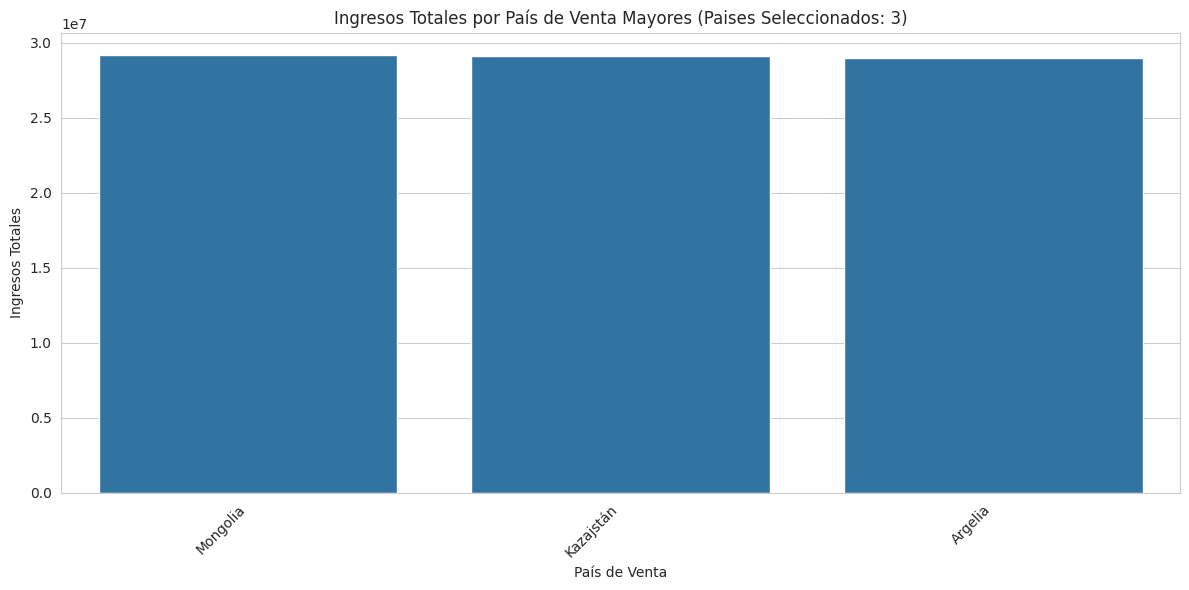

In [128]:
# Agrupar por 'País de Venta' y sumar los ingresos totales
ingresos_por_pais = df.groupby('País de Venta', as_index=False)['Ingresos Totales'].sum()

# Ordenar por ingresos totales en orden descendente
ingresos_por_pais = ingresos_por_pais.sort_values(by='Ingresos Totales', ascending=False)

while True:
    # Preguntar al usuario qué desea ver
    opcion = input("¿Qué países desea ver? (Top/Bottom/Ambos): ").lower()

    # Obtener la cantidad de países para Top y Bottom
    if opcion in ["top", "bottom", "ambos"]:
        try:
            if opcion in ["top", "ambos"]:
                num_paises_top = int(input("¿Cuántos países desea ver como Top?: "))
            else:
                num_paises_top = 0  # No se usa si no es Top o Ambos

            if opcion in ["bottom", "ambos"]:
                num_paises_bottom = int(input("¿Cuántos países desea ver como Bottom?: "))
            else:
                num_paises_bottom = 0  # No se usa si no es Bottom o Ambos
        except ValueError:
            print("Entrada no válida. Por favor, ingrese un número entero.")
            continue  # Regresa al inicio del bucle

        # Crear el DataFrame combinado según la selección del usuario
        combined = pd.DataFrame()  # Inicializa un DataFrame vacío

        if opcion == "top":
            combined = ingresos_por_pais.head(num_paises_top)
            titulo = f'Ingresos Totales por País de Venta Mayores (Paises Seleccionados: {num_paises_top})'
        elif opcion == "bottom":
            combined = ingresos_por_pais.tail(num_paises_bottom)
            titulo = f'Ingresos Totales por País de Venta Menores (Paises Seleccionados: {num_paises_bottom})'
        elif opcion == "ambos":
            top = ingresos_por_pais.head(num_paises_top)
            bottom = ingresos_por_pais.tail(num_paises_bottom)
            combined = pd.concat([top, bottom])
            titulo = f'Ingresos Totales por País de Venta (Mayores {num_paises_top} y Menores {num_paises_bottom})'
        else:
            print("Opción no válida. Mostrando todos los países.")
            combined = ingresos_por_pais
            titulo = 'Ingresos Totales por País de Venta'

        # Crear el gráfico de barras
        plt.figure(figsize=(12, 6))
        sns.barplot(x='País de Venta', y='Ingresos Totales', data=combined)
        plt.title(titulo)
        plt.xlabel('País de Venta')
        plt.ylabel('Ingresos Totales')
        plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
        plt.tight_layout()  # Ajustar el diseño para evitar el recorte de etiquetas
        plt.show()

        break  # Sale del bucle después de mostrar el gráfico
    else:
        print("Opción no válida.")
        break  # Sale del bucle si la opción no es válida

Histograma

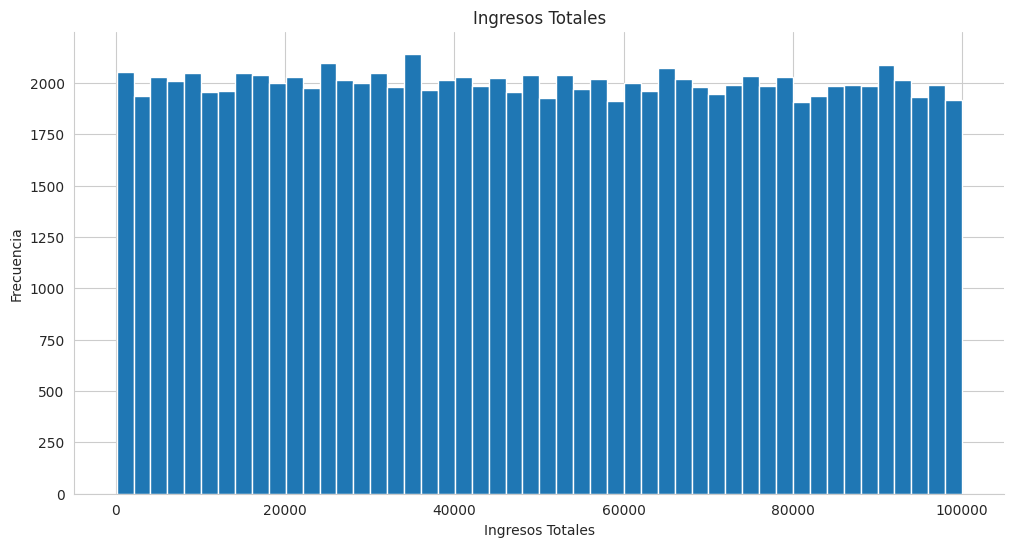

In [129]:

# Generar el histograma
n, bins, patches = plt.hist(df['Ingresos Totales'], bins=50)  # Guarda valores para análisis posterior

# Personalizar el gráfico
plt.title('Ingresos Totales') #Establece el título del gráfico.
plt.xlabel('Ingresos Totales') #Etiqueta el eje x como 'Ingresos Totales'.
plt.ylabel('Frecuencia') #Etiqueta el eje y como 'Frecuencia'.

# Eliminar bordes superior y derecho para una apariencia más limpia
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar el gráfico
plt.show()




In [130]:
# --- Explicación del gráfico mediante código ---

# 1. Valores Centrales:
media = df['Ingresos Totales'].mean() #Calcula la media de los ingresos totales.
mediana = df['Ingresos Totales'].median() #Calcula la mediana de los ingresos totales.
print(f"Valores Centrales: Media = {media:.2f}, Mediana = {mediana:.2f}")

# 2. Dispersión:
desviacion_estandar = df['Ingresos Totales'].std() #Calcula la desviación estándar de los ingresos totales.
rango = df['Ingresos Totales'].max() - df['Ingresos Totales'].min() #Calcula el rango de los ingresos totales.
print(f"Dispersión: Desviación Estándar = {desviacion_estandar:.2f}, Rango = {rango:.2f}")

# 3. Moda (Valor más frecuente):
# Encuentra el bin con la frecuencia más alta en el histograma.
indice_moda = n.argmax() #Obtiene el índice del bin con la frecuencia más alta.
moda = (bins[indice_moda] + bins[indice_moda+1])/2  # Calcula la moda como el punto medio del bin
print(f"Moda (aproximada): {moda:.2f} (punto medio del bin más frecuente)")

# 4. Asimetría (Skewness):
asimetria = df['Ingresos Totales'].skew() #Calcula la asimetría de la distribución.
print(f"Asimetría (Skewness): {asimetria:.2f}")
if asimetria > 0:
    print("La distribución tiene una cola hacia la derecha (sesgo positivo).")
elif asimetria < 0:
    print("La distribución tiene una cola hacia la izquierda (sesgo negativo).")
else:
    print("La distribución es aproximadamente simétrica.")

# 5. Curtosis (Kurtosis):
curtosis = df['Ingresos Totales'].kurtosis() #Calcula la curtosis de la distribución.
print(f"Curtosis (Kurtosis): {curtosis:.2f}")
if curtosis > 0:
    print("La distribución tiene colas más pesadas y un pico más agudo que una distribución normal (leptocúrtica).")
elif curtosis < 0:
    print("La distribución tiene colas más ligeras y un pico más plano que una distribución normal (platicúrtica).")
else:
    print("La distribución tiene una curtosis similar a una distribución normal (mesocúrtica).")


Valores Centrales: Media = 49862.98, Mediana = 49665.94
Dispersión: Desviación Estándar = 28807.85, Rango = 99898.35
Moda (aproximada): 35065.05 (punto medio del bin más frecuente)
Asimetría (Skewness): 0.01
La distribución tiene una cola hacia la derecha (sesgo positivo).
Curtosis (Kurtosis): -1.20
La distribución tiene colas más ligeras y un pico más plano que una distribución normal (platicúrtica).


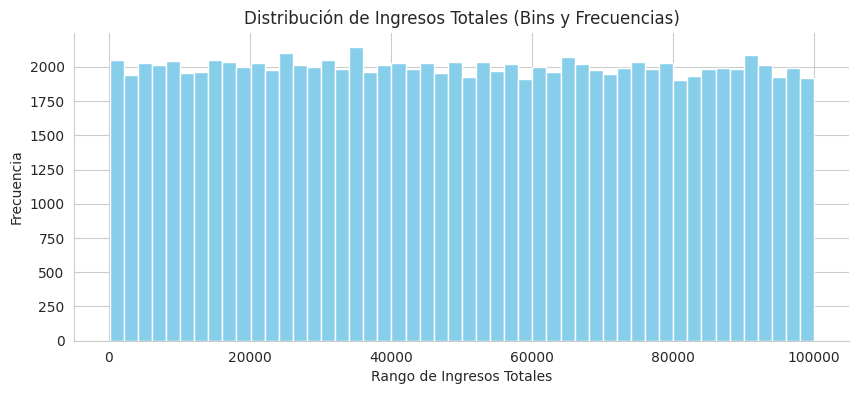

In [131]:
# --- Gráfico de Bins y Frecuencias (Gráfico de Barras) ---
plt.figure(figsize=(10, 4))
bin_mids = (bins[:-1] + bins[1:]) / 2 # Calcular el punto medio de cada bin para el eje x
plt.bar(bin_mids, n, width=bins[1] - bins[0], color='skyblue')  #Graficar cada bin
plt.xlabel('Rango de Ingresos Totales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos Totales (Bins y Frecuencias)')
plt.gca().spines[['top', 'right']].set_visible(False)



In [132]:


# --- Explicación del Gráfico y de los Bins mediante Código ---
print("\n--- Explicación del Gráfico de Bins y Frecuencias ---")
print("Este gráfico muestra la distribución de los Ingresos Totales divididos en rangos (bins).")
print(f"Se utilizaron {len(bins)-1} bins.")
print("Cada barra representa un rango de Ingresos Totales, y su altura indica la frecuencia (número de valores) que caen dentro de ese rango.")

total_valores = int(sum(n)) #Cantidad total de valores
print(f"Cantidad total de valores en los ingresos totales: {total_valores}")

bin_con_max_frecuencia = int(n.argmax()) #Encontrar el bin con la frecuencia más alta
print(f"Bin con maxima frecuencia: {bin_con_max_frecuencia}")

rango_bin_max_frecuencia = (bins[bin_con_max_frecuencia], bins[bin_con_max_frecuencia + 1]) #Encontrar el rango de la maxima frecuencia
print(f"Rango de ingresos totales con maxima frecuencia: {rango_bin_max_frecuencia}")

print("\nInterpretación:")
for i in range(len(n)):
    print(f"  Bin [{bins[i]:.2f}, {bins[i+1]:.2f}): Frecuencia = {int(n[i])}, Porcentaje: {n[i]/total_valores*100:.2f}%")
print("\nObserva cómo la altura de las barras refleja la concentración de datos en diferentes rangos de ingresos.")


--- Explicación del Gráfico de Bins y Frecuencias ---
Este gráfico muestra la distribución de los Ingresos Totales divididos en rangos (bins).
Se utilizaron 50 bins.
Cada barra representa un rango de Ingresos Totales, y su altura indica la frecuencia (número de valores) que caen dentro de ese rango.
Cantidad total de valores en los ingresos totales: 100000
Bin con maxima frecuencia: 17
Rango de ingresos totales con maxima frecuencia: (np.float64(34066.068999999996), np.float64(36064.03599999999))

Interpretación:
  Bin [100.63, 2098.60): Frecuencia = 2053, Porcentaje: 2.05%
  Bin [2098.60, 4096.56): Frecuencia = 1938, Porcentaje: 1.94%
  Bin [4096.56, 6094.53): Frecuencia = 2029, Porcentaje: 2.03%
  Bin [6094.53, 8092.50): Frecuencia = 2011, Porcentaje: 2.01%
  Bin [8092.50, 10090.46): Frecuencia = 2046, Porcentaje: 2.05%
  Bin [10090.46, 12088.43): Frecuencia = 1954, Porcentaje: 1.95%
  Bin [12088.43, 14086.40): Frecuencia = 1959, Porcentaje: 1.96%
  Bin [14086.40, 16084.37): Frecuen

In [134]:
# --- Calcular Estadísticas ---
media = df['Ingresos Totales'].mean()
mediana = df['Ingresos Totales'].median()
desviacion_estandar = df['Ingresos Totales'].std()
asimetria = df['Ingresos Totales'].skew()
curtosis = df['Ingresos Totales'].kurtosis()


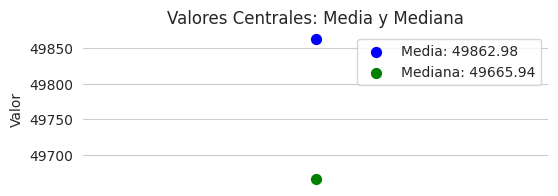

In [135]:
# ---  Gráfico de Puntos (Dot Plot) ---
plt.figure(figsize=(6, 2))  # Reducir el tamaño vertical
plt.scatter(['Valores Centrales'], [media], color='blue', label=f'Media: {media:.2f}', s=50)
plt.scatter(['Valores Centrales'], [mediana], color='green', label=f'Mediana: {mediana:.2f}', s=50)
plt.ylabel('Valor')
plt.title('Valores Centrales: Media y Mediana')
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.xticks([])  # Ocultar ticks del eje x
plt.legend()
plt.show()



In [136]:
# --- Interpretación del Gráfico 2 ---
print("\n--- Gráfico de Puntos (Dot Plot) ---")
print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
if media > mediana:
    print("La media es mayor que la mediana, lo que sugiere una posible asimetría positiva (cola hacia la derecha).")
elif media < mediana:
    print("La media es menor que la mediana, lo que sugiere una posible asimetría negativa (cola hacia la izquierda).")
else:
    print("La media y la mediana son iguales, lo que sugiere una distribución simétrica.")


--- Gráfico de Puntos (Dot Plot) ---
Media: 49862.98
Mediana: 49665.94
La media es mayor que la mediana, lo que sugiere una posible asimetría positiva (cola hacia la derecha).


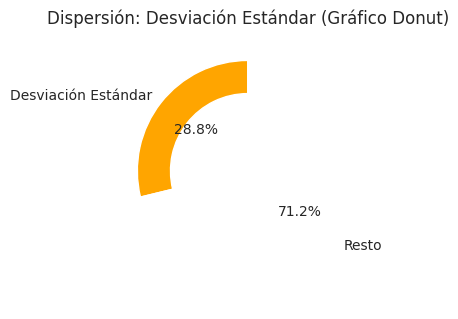

In [137]:
# ---  Gráfico de Donut (Pie Chart) ---
plt.figure(figsize=(4, 4))
size = 0.3  # Tamaño del círculo central
max_value = df['Ingresos Totales'].max()
donut_data = [desviacion_estandar, max_value - desviacion_estandar] # Se calculan los valores para el donut

plt.pie(donut_data,
        labels=['Desviación Estándar', 'Resto'],
        colors=['orange', 'white'],
        autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=size, edgecolor='w'))

centre_circle = plt.Circle((0, 0), size, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Dispersión: Desviación Estándar (Gráfico Donut)')
plt.tight_layout()
plt.show()



In [138]:
# --- Explicación del Gráfico 2 ---
print("\n--- Gráfico 2: Gráfico de Donut ---")
print(f"La desviación estándar es {desviacion_estandar:.2f} y el valor máximo es {max_value:.2f}")
print("Este gráfico muestra la desviación estándar como una proporción del valor máximo de Ingresos Totales.")
print(f"El anillo naranja representa el {desviacion_estandar / max_value * 100:.2f}% del valor máximo.")
print("Esta representación es útil para entender la magnitud de la dispersión en relación con el valor máximo posible.")


--- Gráfico 2: Gráfico de Donut ---
La desviación estándar es 28807.85 y el valor máximo es 99998.98
Este gráfico muestra la desviación estándar como una proporción del valor máximo de Ingresos Totales.
El anillo naranja representa el 28.81% del valor máximo.
Esta representación es útil para entender la magnitud de la dispersión en relación con el valor máximo posible.


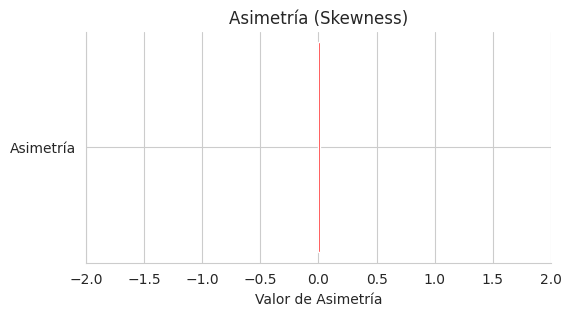

In [139]:
# --- Gráfico de Barras Horizontal ---
plt.figure(figsize=(6, 3))  # Ajustar el tamaño para un mejor aspecto
plt.barh(['Asimetría'], [asimetria], color='red')
plt.xlabel('Valor de Asimetría')
plt.title('Asimetría (Skewness)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(-2, 2) # Asegurar que el rango sea visible
plt.show()



In [140]:
# --- Explicación del Gráfico  ---
print("--- Gráfico de Barras Horizontal ---")
print(f"Valor de Asimetría: {asimetria:.2f}")
print("Un valor positivo indica una cola más larga a la derecha (sesgo positivo).")
print("Un valor negativo indica una cola más larga a la izquierda (sesgo negativo).")
print("Un valor cercano a cero indica una distribución aproximadamente simétrica.")
if asimetria > 0.5:
    print("La asimetría es moderadamente positiva.")
elif asimetria < -0.5:
    print("La asimetría es moderadamente negativa.")
else:
    print("La asimetría es baja y la distribución es aproximadamente simétrica.")

--- Gráfico de Barras Horizontal ---
Valor de Asimetría: 0.01
Un valor positivo indica una cola más larga a la derecha (sesgo positivo).
Un valor negativo indica una cola más larga a la izquierda (sesgo negativo).
Un valor cercano a cero indica una distribución aproximadamente simétrica.
La asimetría es baja y la distribución es aproximadamente simétrica.


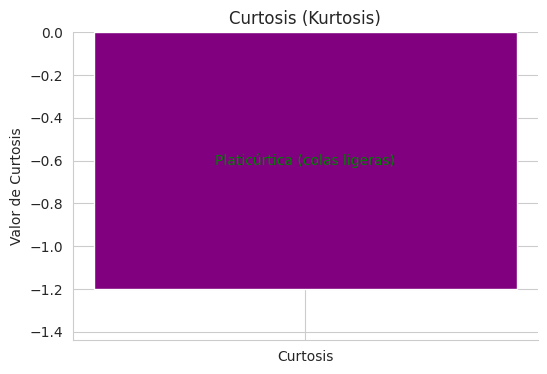

In [141]:
# --- Crear el Gráfico de Barras para la Curtosis ---
plt.figure(figsize=(6, 4))  # Ajustar el tamaño de la figura
plt.bar(['Curtosis'], [curtosis], color='purple')
plt.ylabel('Valor de Curtosis')
plt.title('Curtosis (Kurtosis)')
plt.gca().spines[['top', 'right']].set_visible(False)

# Ajustar los límites del eje y para mostrar valores positivos y negativos correctamente
plt.ylim(min(0, curtosis) * 1.2, max(0, curtosis) * 1.2)

# Agregar texto descriptivo en el gráfico
if curtosis < -0.8:  # Umbral para indicar una curtosis muy negativa
    texto = "Platicúrtica (colas ligeras)"
    color_texto = 'green'
elif curtosis > 0.8:  # Umbral para indicar una curtosis muy positiva
    texto = "Leptocúrtica (colas pesadas)"
    color_texto = 'red'
else:
    texto = "Mesocúrtica (similar a normal)"
    color_texto = 'blue'

plt.text(0, curtosis/2, texto, ha='center', va='center', color=color_texto, fontsize=10) #Posiciona el texto en el centro de la barra.

plt.show()



In [142]:
# --- Explicación mediante Código ---
print("--- Explicación de la Curtosis ---")
print(f"Valor de Curtosis: {curtosis:.2f}")

print("\nInterpretación:")
print("La curtosis mide la forma de la cola de la distribución de los datos.")
print("En este caso, la curtosis de los 'Ingresos Totales' es:")
if curtosis > 0:
    print(f"- {curtosis:.2f} > 0: La distribución es leptocúrtica, lo que significa que tiene colas más pesadas y un pico más agudo que una distribución normal.")
    print("  Esto sugiere que hay más valores extremos (outliers) y una mayor concentración de valores alrededor de la media.")
elif curtosis < 0:
    print(f"- {curtosis:.2f} < 0: La distribución es platicúrtica, lo que significa que tiene colas más ligeras y un pico más plano que una distribución normal.")
    print("  Esto sugiere menos valores extremos y una distribución más uniforme de los valores.")
else:
    print(f"- {curtosis:.2f} = 0: La distribución es mesocúrtica, lo que significa que tiene una curtosis similar a la de una distribución normal.")

print("En resumen, la curtosis proporciona información sobre la 'concentración' de los datos en las colas de la distribución.")

--- Explicación de la Curtosis ---
Valor de Curtosis: -1.20

Interpretación:
La curtosis mide la forma de la cola de la distribución de los datos.
En este caso, la curtosis de los 'Ingresos Totales' es:
- -1.20 < 0: La distribución es platicúrtica, lo que significa que tiene colas más ligeras y un pico más plano que una distribución normal.
  Esto sugiere menos valores extremos y una distribución más uniforme de los valores.
En resumen, la curtosis proporciona información sobre la 'concentración' de los datos en las colas de la distribución.


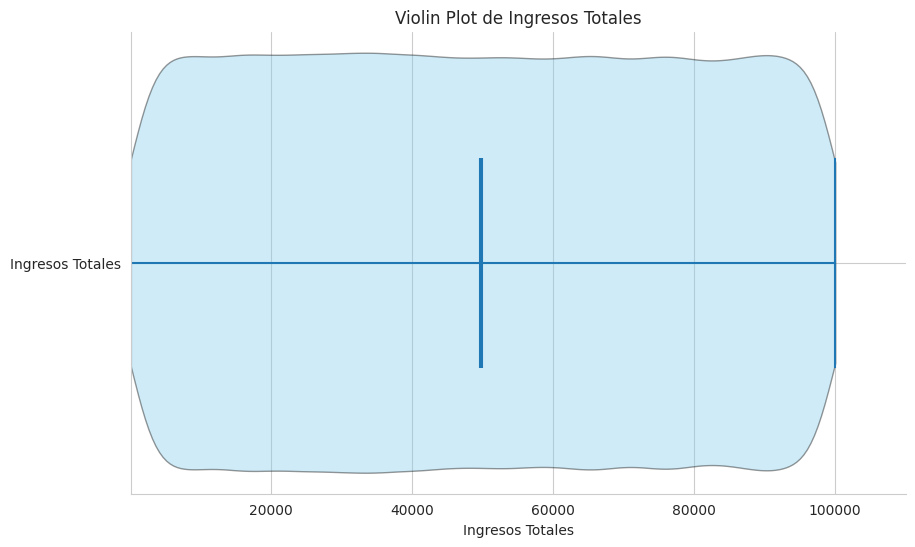

In [143]:
# --- Calcular Estadísticas Clave ---
media = df['Ingresos Totales'].mean()
mediana = df['Ingresos Totales'].median()
q1 = df['Ingresos Totales'].quantile(0.25)  # Primer cuartil (25%)
q3 = df['Ingresos Totales'].quantile(0.75)  # Tercer cuartil (75%)
min_value = df['Ingresos Totales'].min()
max_value = df['Ingresos Totales'].max()

# --- Crear Violin Plot ---
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura para mejor visualización
parts = plt.violinplot(df['Ingresos Totales'], vert=False, showmeans=True, showmedians=True,
                       widths=0.7,  # Ajustar el ancho del violín
                       points=200,  # Aumentar el número de puntos para una forma más suave
                       bw_method='scott') # Utilizar el método 'scott' para la estimación de la densidad

# Personalizar el color del cuerpo del violín
for pc in parts['bodies']:
    pc.set_facecolor('skyblue')  # Cambiar a un azul claro
    pc.set_edgecolor('black')    # Agregar un borde negro
    pc.set_alpha(0.4)           # Ajustar la transparencia

# --- Agregar Título y Etiquetas ---
plt.xlabel('Ingresos Totales')
plt.title('Violin Plot de Ingresos Totales')
plt.gca().spines[['top', 'right']].set_visible(False) # Quitar spines superior y derecho
plt.yticks([1], ['Ingresos Totales']) #Asegura que el eje Y tenga una etiqueta significativa.

# --- Ajustar el rango del eje x ---
plt.xlim(min_value * 0.9, max_value * 1.1)  # Ampliar ligeramente el rango

plt.show()

In [144]:


# --- Explicación del Violin Plot mediante Código ---
print("--- Explicación del Violin Plot ---")
print(f"Media de Ingresos Totales: {media:.2f}")
print(f"Mediana de Ingresos Totales: {mediana:.2f}")
print(f"Primer Cuartil (Q1): {q1:.2f}")
print(f"Tercer Cuartil (Q3): {q3:.2f}")
print(f"Valor Mínimo: {min_value:.2f}")
print(f"Valor Máximo: {max_value:.2f}")

print("\nInterpretación:")
print("El violin plot muestra la distribución de los 'Ingresos Totales'.")
print(" - El *ancho* del violín en diferentes puntos indica la *densidad* de datos en esos niveles de ingresos.")
print("   Áreas más anchas significan que hay más valores de ingresos cerca de ese nivel.")
print(" - La *línea blanca* dentro del violín representa la *mediana* de los ingresos.")
print(" - El *punto* dentro del violín representa la *media* de los ingresos.")
print(" - Las líneas verticales se extienden hasta los valores máximo y mínimo, o hasta un valor determinado por el método de cálculo de la densidad.")
print(" - Comparando la media y la mediana, podemos inferir la asimetría de la distribución.")
print(" - La forma general del violín proporciona una idea de la dispersión y la concentración de los datos.")
print("   Un violín más ancho sugiere una mayor dispersión, mientras que un violín más estrecho indica una mayor concentración alrededor de la media/mediana.")


--- Explicación del Violin Plot ---
Media de Ingresos Totales: 49862.98
Mediana de Ingresos Totales: 49665.94
Primer Cuartil (Q1): 24958.73
Tercer Cuartil (Q3): 74829.69
Valor Mínimo: 100.63
Valor Máximo: 99998.98

Interpretación:
El violin plot muestra la distribución de los 'Ingresos Totales'.
 - El *ancho* del violín en diferentes puntos indica la *densidad* de datos en esos niveles de ingresos.
   Áreas más anchas significan que hay más valores de ingresos cerca de ese nivel.
 - La *línea blanca* dentro del violín representa la *mediana* de los ingresos.
 - El *punto* dentro del violín representa la *media* de los ingresos.
 - Las líneas verticales se extienden hasta los valores máximo y mínimo, o hasta un valor determinado por el método de cálculo de la densidad.
 - Comparando la media y la mediana, podemos inferir la asimetría de la distribución.
 - La forma general del violín proporciona una idea de la dispersión y la concentración de los datos.
   Un violín más ancho sugiere un

In [145]:
# Detectar valores de ventas negativos
ventas_negativas = df[df['Ingresos Totales'] < 0]
print("Ventas negativas:\n", ventas_negativas)

Ventas negativas:
 Empty DataFrame
Columns: [ID del Producto, Nombre del Producto, Categoría, Precio Unitario, Cantidad Vendida, Ingresos Totales, Región de Venta, País de Venta, Ciudad de Venta, Fecha de Venta, Método de Pago, Descuento Aplicado, Costo de Envío, Tiempo de Entrega (días), Calificación del Producto, Número de Reseñas, Proveedor, Marca, Canal de Venta, Plataforma de Venta, Stock Disponible, Devoluciones, Motivo de Devolución, Satisfacción del Cliente, Comentarios del Cliente]
Index: []

[0 rows x 25 columns]


In [146]:
# Detectar filas duplicadas en el DataFrame
duplicados = df.duplicated('ID del Producto')
print("Filas duplicadas:\n", df[duplicados])

Filas duplicadas:
 Empty DataFrame
Columns: [ID del Producto, Nombre del Producto, Categoría, Precio Unitario, Cantidad Vendida, Ingresos Totales, Región de Venta, País de Venta, Ciudad de Venta, Fecha de Venta, Método de Pago, Descuento Aplicado, Costo de Envío, Tiempo de Entrega (días), Calificación del Producto, Número de Reseñas, Proveedor, Marca, Canal de Venta, Plataforma de Venta, Stock Disponible, Devoluciones, Motivo de Devolución, Satisfacción del Cliente, Comentarios del Cliente]
Index: []

[0 rows x 25 columns]


In [147]:
# Calcular los valores máximos y mínimos en el DataFrame

maximos = df.max()
minimos = df.min()
print("\n","Valores máximos por columna:\n\n", maximos, "\n\n")

print("Valores mínimos por columna:\n\n", minimos)


 Valores máximos por columna:

 ID del Producto                           ffff98aa-66b5-4a9a-ada7-515a19bae9b6
Nombre del Producto                                                     iPhone
Categoría                                                          Categoria D
Precio Unitario                                                         999.99
Cantidad Vendida                                                           100
Ingresos Totales                                                      99998.98
Región de Venta                                               Región de Murcia
País de Venta                                                         Zimbabwe
Ciudad de Venta                                                          Ávila
Fecha de Venta                                             2025-05-21 00:00:00
Método de Pago                                          Transferencia Bancaria
Descuento Aplicado                                                        50.0
Costo de Envío     

In [148]:
# Contar el número de registros en el DataFrame
num_registros = len(df)
print(f"El número de registros en el DataFrame es: {num_registros}")

El número de registros en el DataFrame es: 100000


Cantidad de ventas por Pais

In [149]:
# Detectar y traer filas donde se repite el valor en la columna 'País de Venta'
duplicados_ventas = df[df.duplicated(subset=['País de Venta'], keep=False)]

# Contar la cantidad de veces que se repite cada país
conteo_paises = duplicados_ventas['País de Venta'].value_counts()

# Convertir el conteo a un DataFrame con formato de tabla
tabla_conteo_paises = conteo_paises.reset_index()
tabla_conteo_paises.columns = ['País de Venta', 'Cantidad de Repeticiones']

print("Cantidad de veces que se repite cada país en formato de tabla:\n", tabla_conteo_paises)

Cantidad de veces que se repite cada país en formato de tabla:
                 País de Venta  Cantidad de Repeticiones
0                   Kazajstán                       578
1    República Centroafricana                       575
2                     Argelia                       572
3                       Qatar                       567
4                      Israel                       562
..                        ...                       ...
188                    Gambia                       478
189                   Bélgica                       477
190              Países Bajos                       473
191                    Líbano                       470
192                   Ecuador                       456

[193 rows x 2 columns]


Ingresos totales por Producto

In [150]:
# Agrupar por nombre del producto y calcular los ingresos totales por producto
ingresos_por_producto = df.groupby('Nombre del Producto')['Ingresos Totales'].sum().reset_index()

# Ordenar por ingresos totales en orden descendente
ingresos_por_producto = ingresos_por_producto.sort_values(by='Ingresos Totales', ascending=False)

# Mostrar el resultado
print("Ingresos totales por producto:\n", ingresos_por_producto)

Ingresos totales por producto:
             Nombre del Producto  Ingresos Totales
15              Superman Comics      2.572934e+08
13               Samsung Galaxy      2.564992e+08
0                         Arroz      2.535623e+08
17  Thriller de Michael Jackson      2.526293e+08
8                   Laptop Dell      2.525619e+08
12                PlayStation 2      2.524554e+08
18                        Trigo      2.518611e+08
7                          LEGO      2.516465e+08
5                 Fire TV Stick      2.516075e+08
11                 Nike Air Max      2.504415e+08
9             Memoria Flash USB      2.499820e+08
19                       iPhone      2.490290e+08
1                          Café      2.478129e+08
3         Contenedor de Pañales      2.472245e+08
14                 Serum Facial      2.465357e+08
2                     Coca-Cola      2.456248e+08
10                    Minecraft      2.444637e+08
16                Tesla Model Y      2.435137e+08
6                 

Limpieza y preparacion de datos

In [151]:
# Manejo de Valores Faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
ID del Producto              0
Nombre del Producto          0
Categoría                    0
Precio Unitario              0
Cantidad Vendida             0
Ingresos Totales             0
Región de Venta              0
País de Venta                0
Ciudad de Venta              0
Fecha de Venta               0
Método de Pago               0
Descuento Aplicado           0
Costo de Envío               0
Tiempo de Entrega (días)     0
Calificación del Producto    0
Número de Reseñas            0
Proveedor                    0
Marca                        0
Canal de Venta               0
Plataforma de Venta          0
Stock Disponible             0
Devoluciones                 0
Motivo de Devolución         0
Satisfacción del Cliente     0
Comentarios del Cliente      0
dtype: int64


In [152]:
# Corrección de Tipos de Datos
# Convertir la columna 'Fecha de Venta' a tipo datetime
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

In [153]:
# Eliminación de Duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [154]:
# Eliminar filas duplicadas:
 #df.drop_duplicates(inplace=True)

In [155]:
# Creación de Nuevas Variables (Feature Engineering)
# Crear una columna para el mes de la venta
df['Mes de Venta'] = df['Fecha de Venta'].dt.month

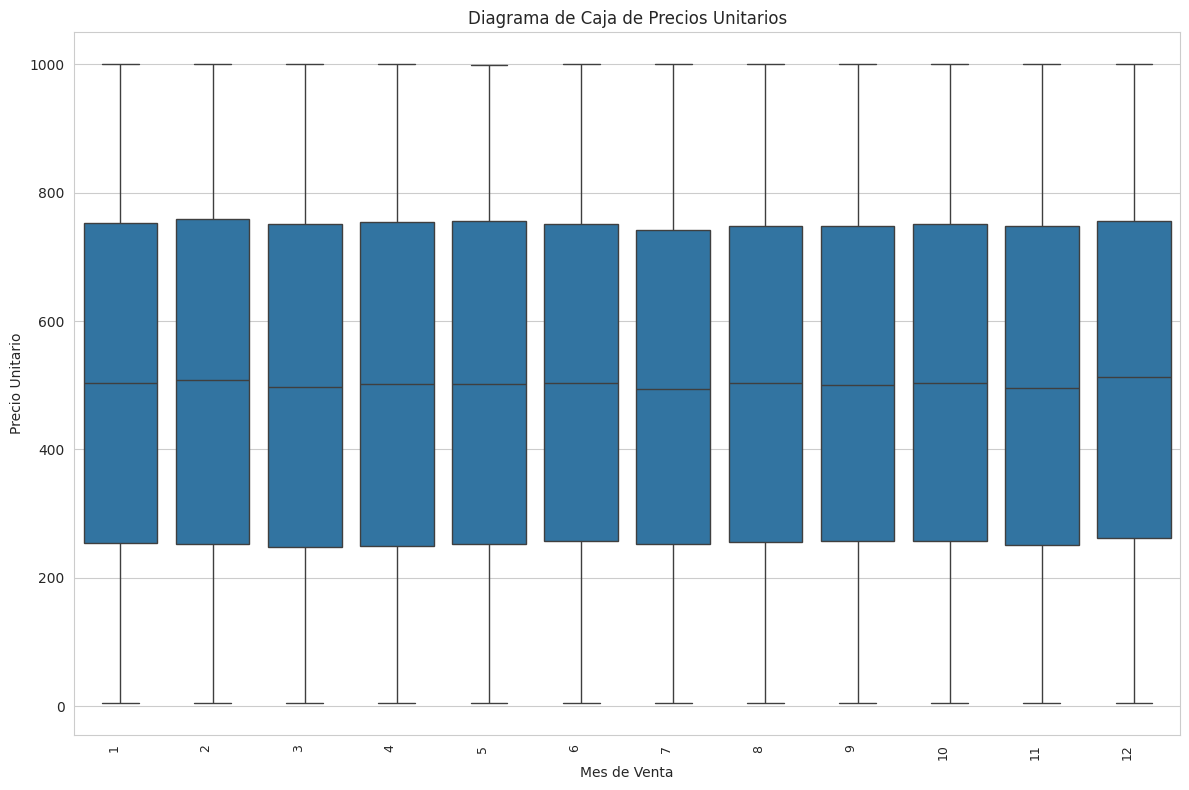

In [156]:
# Gráfico de outliers para la columna 'Precio Unitario'
plt.figure(figsize=(12, 8))  # Ajusta el tamaño para que las etiquetas quepan mejor
sns.boxplot(y=df['Precio Unitario'], x=df['Mes de Venta'])#['Nombre del Producto'])  # Crea un boxplot para la columna 'Precio Unitario'
plt.title('Diagrama de Caja de Precios Unitarios')
plt.ylabel('Precio Unitario')
plt.xticks(rotation=90, ha='right', fontsize=9)  # Ajusta la rotación, alineación y tamaño de la fuente
plt.tight_layout()  # Ajusta los parámetros de la subtrama para que las etiquetas no se superpongan
plt.show()

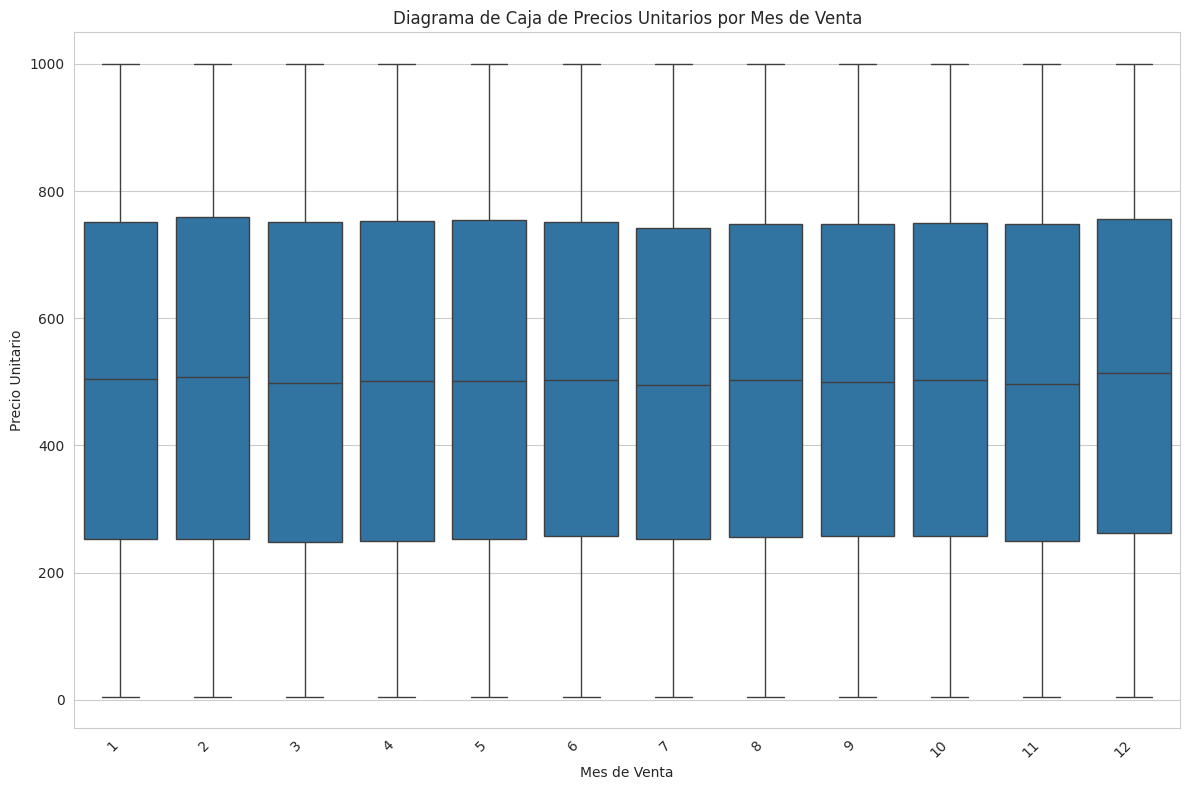

In [157]:
# --- Gráfico de Outliers (Boxplot) ---
plt.figure(figsize=(12, 8))
sns.boxplot(y=df['Precio Unitario'], x=df['Mes de Venta']) #Crea el boxplot
plt.title('Diagrama de Caja de Precios Unitarios por Mes de Venta')
plt.ylabel('Precio Unitario')
plt.xlabel('Mes de Venta')
plt.xticks(rotation=45, ha='right') #Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar los parámetros de la subtrama para que las etiquetas no se superpongan
plt.show()



In [158]:

# --- Explicación del Gráfico y de los Outliers mediante Código ---
print("\n--- Explicación del Diagrama de Caja (Boxplot) ---")
print("Este diagrama de caja muestra la distribución de los Precios Unitarios para cada Mes de Venta.")

q1 = df['Precio Unitario'].quantile(0.25) #Primer cuartil
q3 = df['Precio Unitario'].quantile(0.75) #Tercer cuartil
iqr = q3 - q1 #Rango intercuartílico
limite_inferior = q1 - 1.5 * iqr #Calcula el límite inferior para identificar outliers
limite_superior = q3 + 1.5 * iqr #Calcula el límite superior para identificar outliers

print(f"Primer cuartil (Q1): {q1:.2f}")
print(f"Tercer cuartil (Q3): {q3:.2f}")
print(f"Rango Intercuartílico (IQR): {iqr:.2f}")
print(f"Límite Inferior para Outliers: {limite_inferior:.2f}")
print(f"Límite Superior para Outliers: {limite_superior:.2f}")

outliers = df[(df['Precio Unitario'] < limite_inferior) | (df['Precio Unitario'] > limite_superior)] #Identificar outliers
num_outliers = len(outliers) #Cantidad de outliers
print(f"Número de outliers detectados: {num_outliers}")

if num_outliers > 0:
    print("Los puntos fuera de los 'whiskers' (bigotes) representan los outliers.")
    if num_outliers < 10:
        print("\nOutliers detectados (Precio Unitario y Mes de Venta):")
        for index, row in outliers.iterrows(): #Iterar sobre los outliers y mostrar su precio y mes
            print(f"  Precio Unitario: {row['Precio Unitario']:.2f}, Mes de Venta: {row['Mes de Venta']}")
    else:
        print("\nDemasiados outliers para mostrar individualmente.  Considere investigar los datos con mayor detalle.")
else:
    print("No se detectaron outliers en los datos.")


--- Explicación del Diagrama de Caja (Boxplot) ---
Este diagrama de caja muestra la distribución de los Precios Unitarios para cada Mes de Venta.
Primer cuartil (Q1): 253.54
Tercer cuartil (Q3): 751.58
Rango Intercuartílico (IQR): 498.04
Límite Inferior para Outliers: -493.53
Límite Superior para Outliers: 1498.65
Número de outliers detectados: 0
No se detectaron outliers en los datos.


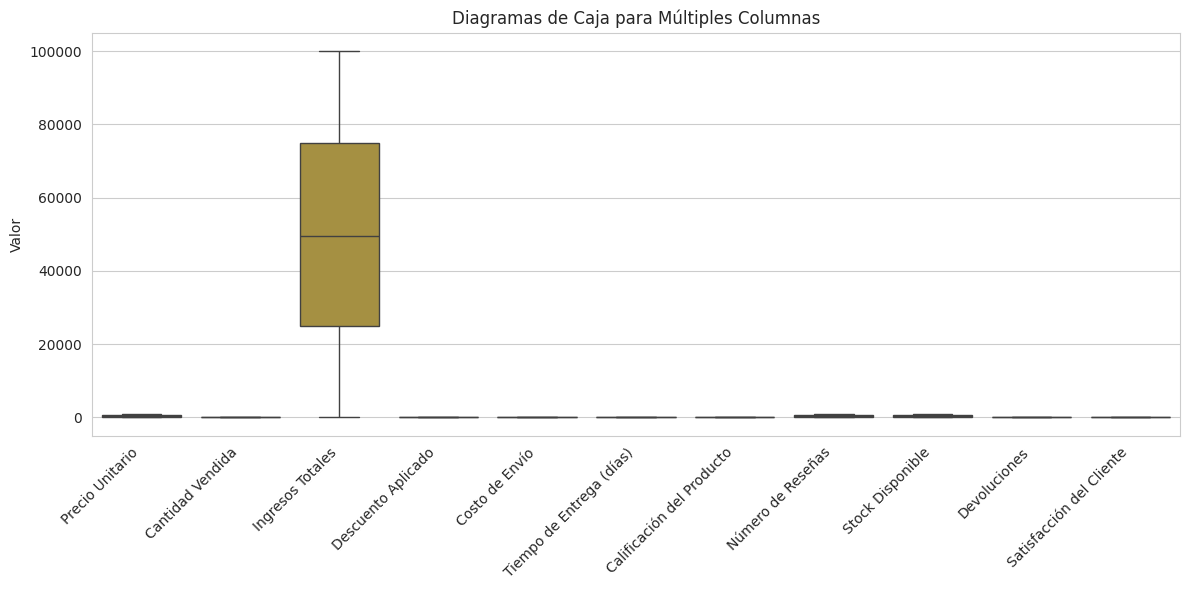

In [159]:
# --- Gráfico de Outliers (Boxplot) para Múltiples Columnas ---
# Define las columnas que deseas analizar
columnas_a_analizar = ['Precio Unitario', 'Cantidad Vendida', 'Ingresos Totales',  # Agrega aquí las columnas numéricas relevantes
                       'Descuento Aplicado', 'Costo de Envío', 'Tiempo de Entrega (días)',
                       'Calificación del Producto', 'Número de Reseñas', 'Stock Disponible',
                       'Devoluciones', 'Satisfacción del Cliente']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columnas_a_analizar]) #Crear el boxplot para las columnas seleccionadas
plt.title('Diagramas de Caja para Múltiples Columnas')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

In [160]:
# --- Explicación del Gráfico y de los Outliers mediante Código ---
print("\n--- Explicación de los Diagramas de Caja (Boxplots) para Múltiples Columnas ---")
print("Estos diagramas de caja muestran la distribución de los valores para cada columna especificada:")
print(columnas_a_analizar)

for columna in columnas_a_analizar:
    print(f"\n--- Análisis de la columna: {columna} ---")
    q1 = df[columna].quantile(0.25) #Calcular el primer cuartil
    q3 = df[columna].quantile(0.75) #Calcular el tercer cuartil
    iqr = q3 - q1 #Calcular el rango intercuartílico
    limite_inferior = q1 - 1.5 * iqr #Calcular el límite inferior para outliers
    limite_superior = q3 + 1.5 * iqr #Calcular el límite superior para outliers

    print(f"  Primer cuartil (Q1): {q1:.2f}")
    print(f"  Tercer cuartil (Q3): {q3:.2f}")
    print(f"  Rango Intercuartílico (IQR): {iqr:.2f}")
    print(f"  Límite Inferior para Outliers: {limite_inferior:.2f}")
    print(f"  Límite Superior para Outliers: {limite_superior:.2f}")

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)] #Identificar los outliers
    num_outliers = len(outliers) #Contar el número de outliers

    print(f"  Número de outliers detectados: {num_outliers}")

    if num_outliers > 0:
        print("  Los puntos fuera de los 'whiskers' (bigotes) representan los outliers.")
        if num_outliers < 10:
            print(f"\n  Outliers detectados ({columna}):")
            for index, row in outliers.iterrows():
                print(f"    Índice: {index}, Valor: {row[columna]:.2f}")
        else:
            print("  Demasiados outliers para mostrar individualmente. Considere investigar los datos con mayor detalle.")
    else:
        print("  No se detectaron outliers en los datos.")


--- Explicación de los Diagramas de Caja (Boxplots) para Múltiples Columnas ---
Estos diagramas de caja muestran la distribución de los valores para cada columna especificada:
['Precio Unitario', 'Cantidad Vendida', 'Ingresos Totales', 'Descuento Aplicado', 'Costo de Envío', 'Tiempo de Entrega (días)', 'Calificación del Producto', 'Número de Reseñas', 'Stock Disponible', 'Devoluciones', 'Satisfacción del Cliente']

--- Análisis de la columna: Precio Unitario ---
  Primer cuartil (Q1): 253.54
  Tercer cuartil (Q3): 751.58
  Rango Intercuartílico (IQR): 498.04
  Límite Inferior para Outliers: -493.53
  Límite Superior para Outliers: 1498.65
  Número de outliers detectados: 0
  No se detectaron outliers en los datos.

--- Análisis de la columna: Cantidad Vendida ---
  Primer cuartil (Q1): 26.00
  Tercer cuartil (Q3): 76.00
  Rango Intercuartílico (IQR): 50.00
  Límite Inferior para Outliers: -49.00
  Límite Superior para Outliers: 151.00
  Número de outliers detectados: 0
  No se detecta

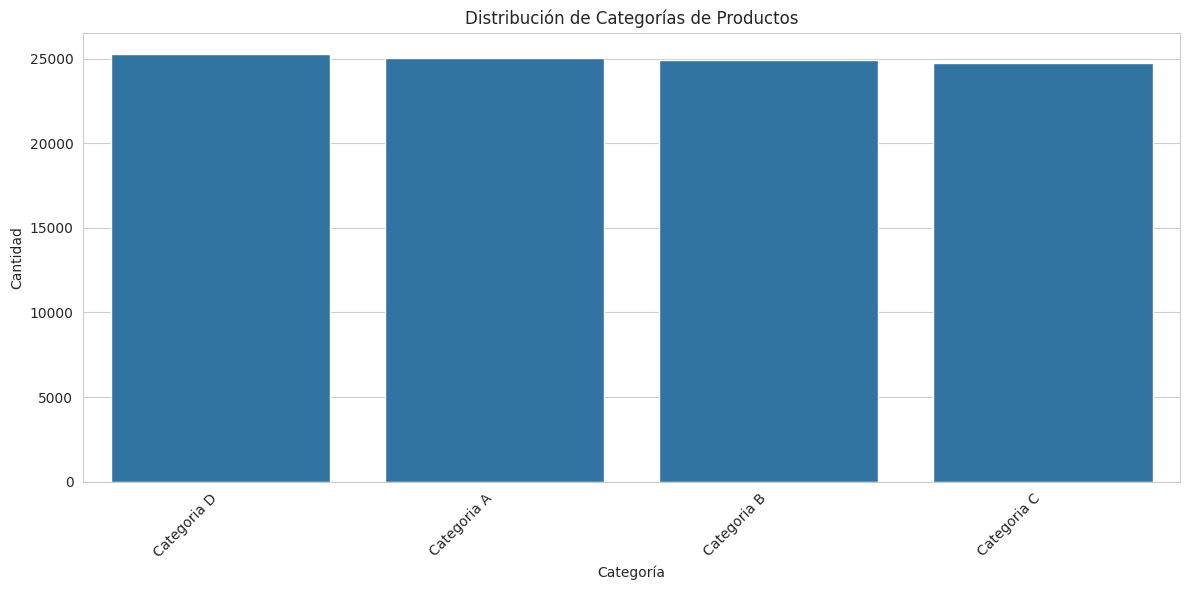

In [161]:
# --- Gráfico de Distribución de Categorías (Countplot) ---
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura para mejor legibilidad
ax = sns.countplot(data=df, x='Categoría', order=df['Categoría'].value_counts().index)
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') #Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()



In [162]:
# --- Explicación del Gráfico y de las Categorías mediante Código ---
print("\n--- Explicación del Gráfico de Distribución de Categorías ---")
print("Este gráfico muestra la frecuencia de cada categoría de productos en el conjunto de datos.")
print("Las categorías están ordenadas por frecuencia, de la más común a la menos común.")

total_registros = len(df) #Total de registros
print(f"Número total de registros en el DataFrame: {total_registros}")

categoria_mas_frecuente = df['Categoría'].value_counts().index[0] #Categoría más frecuente
cantidad_categoria_mas_frecuente = df['Categoría'].value_counts().iloc[0] #Cantidad de la categoría más frecuente
print(f"La categoría más frecuente es: {categoria_mas_frecuente} con {cantidad_categoria_mas_frecuente} registros.")

categoria_menos_frecuente = df['Categoría'].value_counts().index[-1] #Categoría menos frecuente
cantidad_categoria_menos_frecuente = df['Categoría'].value_counts().iloc[-1] #Cantidad de la categoría menos frecuente
print(f"La categoría menos frecuente es: {categoria_menos_frecuente} con {cantidad_categoria_menos_frecuente} registros.")

print("\nDistribución de Categorías:")
for categoria in df['Categoría'].unique(): #Iterar sobre cada categoría y mostrar su frecuencia y porcentaje
    cantidad = len(df[df['Categoría'] == categoria])
    porcentaje = (cantidad / total_registros) * 100
    print(f"  {categoria}: Cantidad = {cantidad}, Porcentaje = {porcentaje:.2f}%")


--- Explicación del Gráfico de Distribución de Categorías ---
Este gráfico muestra la frecuencia de cada categoría de productos en el conjunto de datos.
Las categorías están ordenadas por frecuencia, de la más común a la menos común.
Número total de registros en el DataFrame: 100000
La categoría más frecuente es: Categoria D con 25275 registros.
La categoría menos frecuente es: Categoria C con 24735 registros.

Distribución de Categorías:
  Categoria B: Cantidad = 24957, Porcentaje = 24.96%
  Categoria A: Cantidad = 25033, Porcentaje = 25.03%
  Categoria D: Cantidad = 25275, Porcentaje = 25.27%
  Categoria C: Cantidad = 24735, Porcentaje = 24.73%


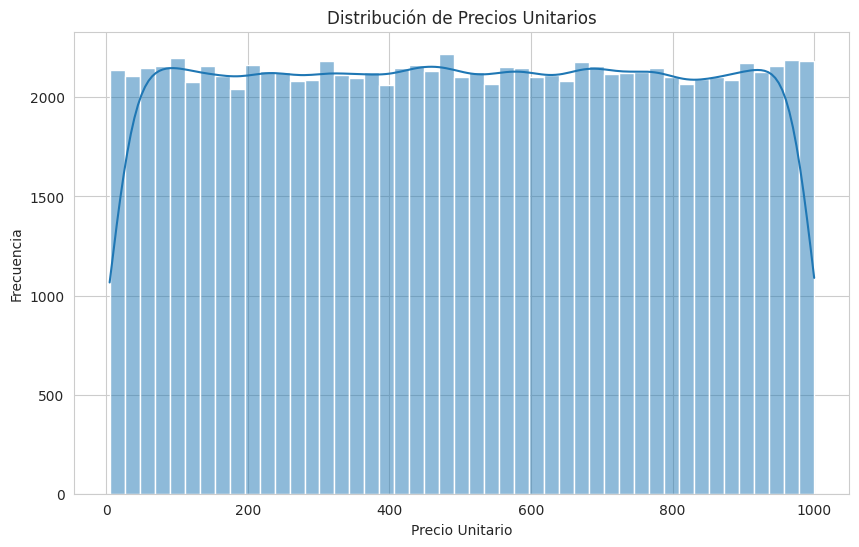

In [163]:
# --- Gráfico de Distribución de Precios Unitarios (Histograma) ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio Unitario'], kde=True)  # Crea el histograma con la estimación de densidad de kernel (KDE)
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.show()



In [164]:
# --- Explicación del Gráfico y de la Distribución mediante Código ---
print("\n--- Explicación del Gráfico de Distribución de Precios Unitarios ---")
print("Este gráfico muestra la distribución de los precios unitarios en el conjunto de datos.")
print("El gráfico es un histograma, donde cada barra representa un rango de precios unitarios, y su altura indica la frecuencia (número de precios) que caen dentro de ese rango.")
print("La línea superpuesta es una estimación de la densidad de kernel (KDE), que proporciona una estimación suavizada de la distribución.")

media = df['Precio Unitario'].mean() #Calcular la media
mediana = df['Precio Unitario'].median() #Calcular la mediana
desviacion_estandar = df['Precio Unitario'].std() #Calcular la desviación estándar
asimetria = df['Precio Unitario'].skew() #Calcular la asimetría

print(f"\nEstadísticas Clave:")
print(f"  Media: {media:.2f}")
print(f"  Mediana: {mediana:.2f}")
print(f"  Desviación Estándar: {desviacion_estandar:.2f}")
print(f"  Asimetría: {asimetria:.2f}")


if asimetria > 0.5:
    print("La distribución tiene una asimetría positiva moderada, lo que significa que hay algunos precios unitarios muy altos que desplazan la media hacia la derecha.")
elif asimetria < -0.5:
    print("La distribución tiene una asimetría negativa moderada, lo que significa que hay algunos precios unitarios muy bajos que desplazan la media hacia la izquierda.")
else:
    print("La distribución es aproximadamente simétrica.")


--- Explicación del Gráfico de Distribución de Precios Unitarios ---
Este gráfico muestra la distribución de los precios unitarios en el conjunto de datos.
El gráfico es un histograma, donde cada barra representa un rango de precios unitarios, y su altura indica la frecuencia (número de precios) que caen dentro de ese rango.
La línea superpuesta es una estimación de la densidad de kernel (KDE), que proporciona una estimación suavizada de la distribución.

Estadísticas Clave:
  Media: 502.81
  Mediana: 502.59
  Desviación Estándar: 287.63
  Asimetría: -0.00
La distribución es aproximadamente simétrica.


Análisis Bivariado (Exploración de la relación entre dos variables)

<Figure size 1200x600 with 0 Axes>

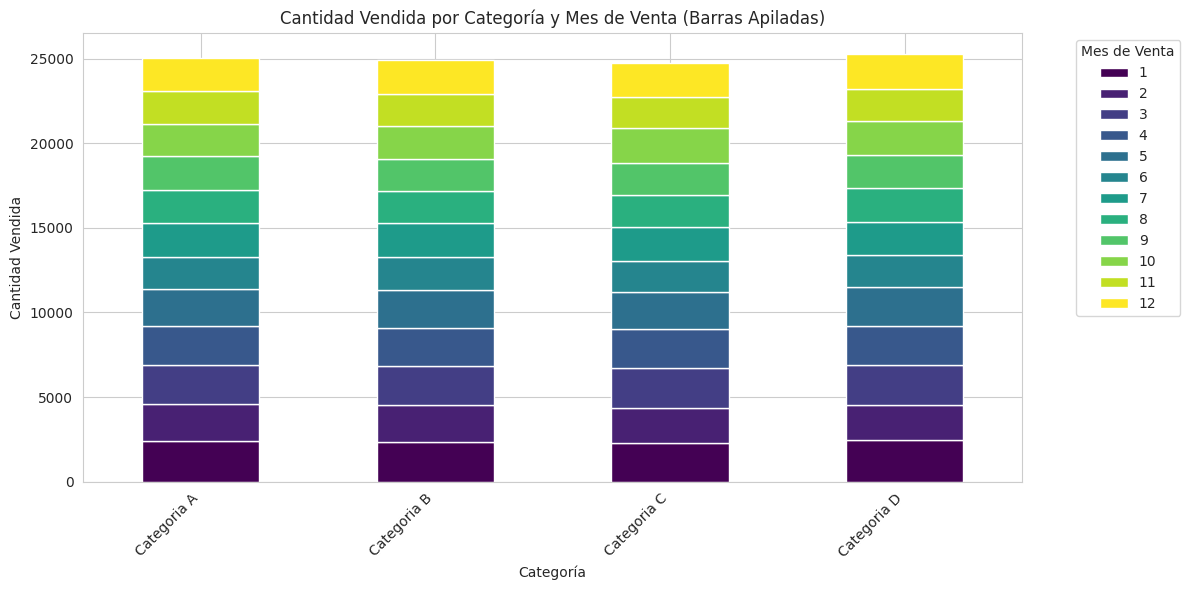

Este gráfico de barras apiladas muestra la cantidad vendida de cada categoría de productos, segmentada por mes de venta.


In [165]:

# --- Gráfico de Barras Apiladas ---


if 'Mes de Venta' in df.columns and 'Categoría' in df.columns:
    plt.figure(figsize=(12, 6))
    conteo_cruzado = pd.crosstab(df['Categoría'], df['Mes de Venta'])
    conteo_cruzado.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Cantidad Vendida por Categoría y Mes de Venta (Barras Apiladas)')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Mes de Venta', bbox_to_anchor=(1.05, 1), loc='upper left') #Mover la leyenda fuera del gráfico
    plt.tight_layout()
    plt.show()


    print("Este gráfico de barras apiladas muestra la cantidad vendida de cada categoría de productos, segmentada por mes de venta.")

else:
    print("\nNo se puede generar el gráfico de barras apiladas porque falta la columna 'Mes de Venta' o 'Categoría'.")


Análisis Multivariado (Exploración de la relación entre múltiples variables

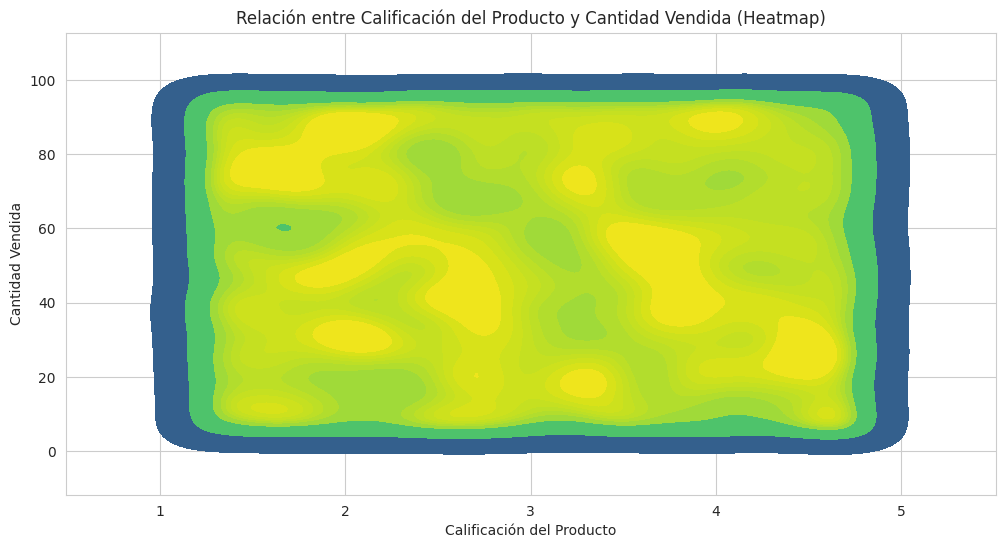

In [166]:
#  Generar el heatmap con kdeplot
sns.kdeplot(
    data=df,                       # DataFrame que contiene los datos.
    x='Calificación del Producto',  # Columna para el eje horizontal (calificación).
    y='Cantidad Vendida',        # Columna para el eje vertical (cantidad).
    cmap="viridis",               # Paleta de colores a usar (de verde a amarillo).
    fill=True                     # Rellena los contornos del heatmap.
)

# 3. Añadir un título al gráfico
plt.title('Relación entre Calificación del Producto y Cantidad Vendida (Heatmap)')

# 4. Mostrar el gráfico
plt.show()

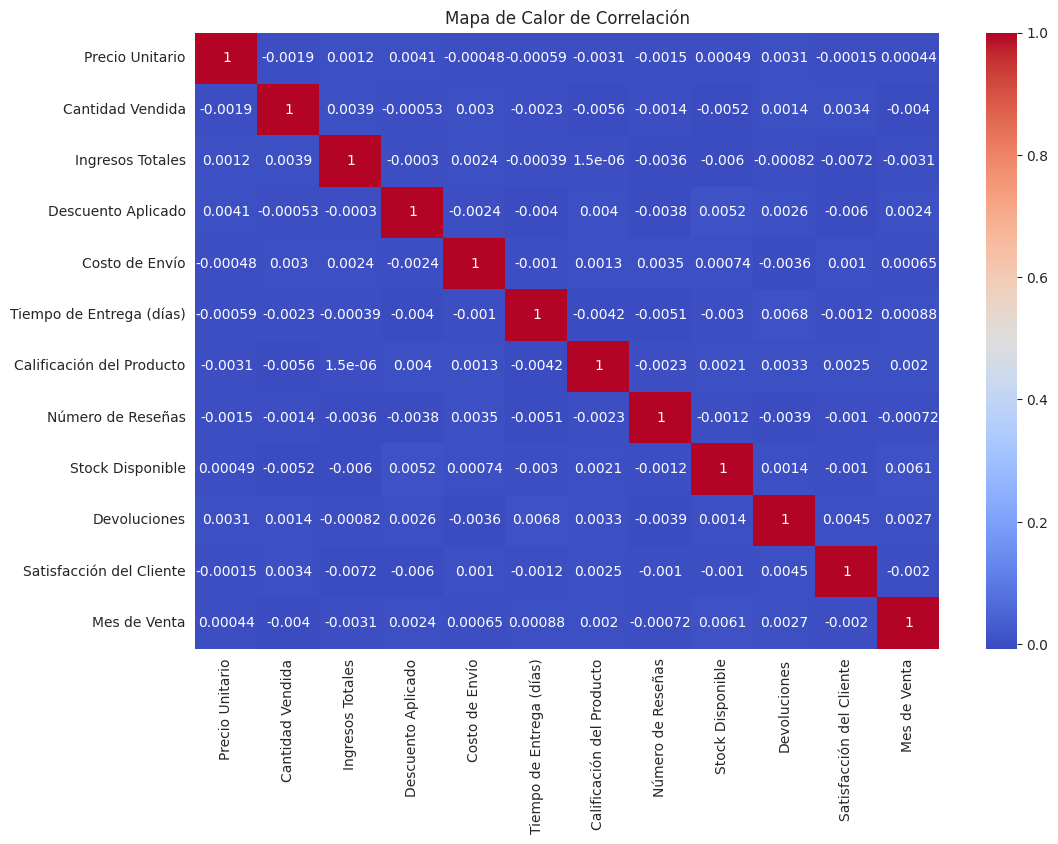

In [167]:
# Mapa de calor de correlación
# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numerical_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [168]:
# Identificación de los Productos Más Vendidos

# Agrupar por nombre del producto y sumar los ingresos totales
productos_mas_vendidos = df.groupby('Nombre del Producto')['Ingresos Totales'].sum().sort_values(ascending=False)
print("\nLos 10 productos más vendidos:")
print(productos_mas_vendidos.head(10))


Los 10 productos más vendidos:
Nombre del Producto
Superman Comics                2.572934e+08
Samsung Galaxy                 2.564992e+08
Arroz                          2.535623e+08
Thriller de Michael Jackson    2.526293e+08
Laptop Dell                    2.525619e+08
PlayStation 2                  2.524554e+08
Trigo                          2.518611e+08
LEGO                           2.516465e+08
Fire TV Stick                  2.516075e+08
Nike Air Max                   2.504415e+08
Name: Ingresos Totales, dtype: float64


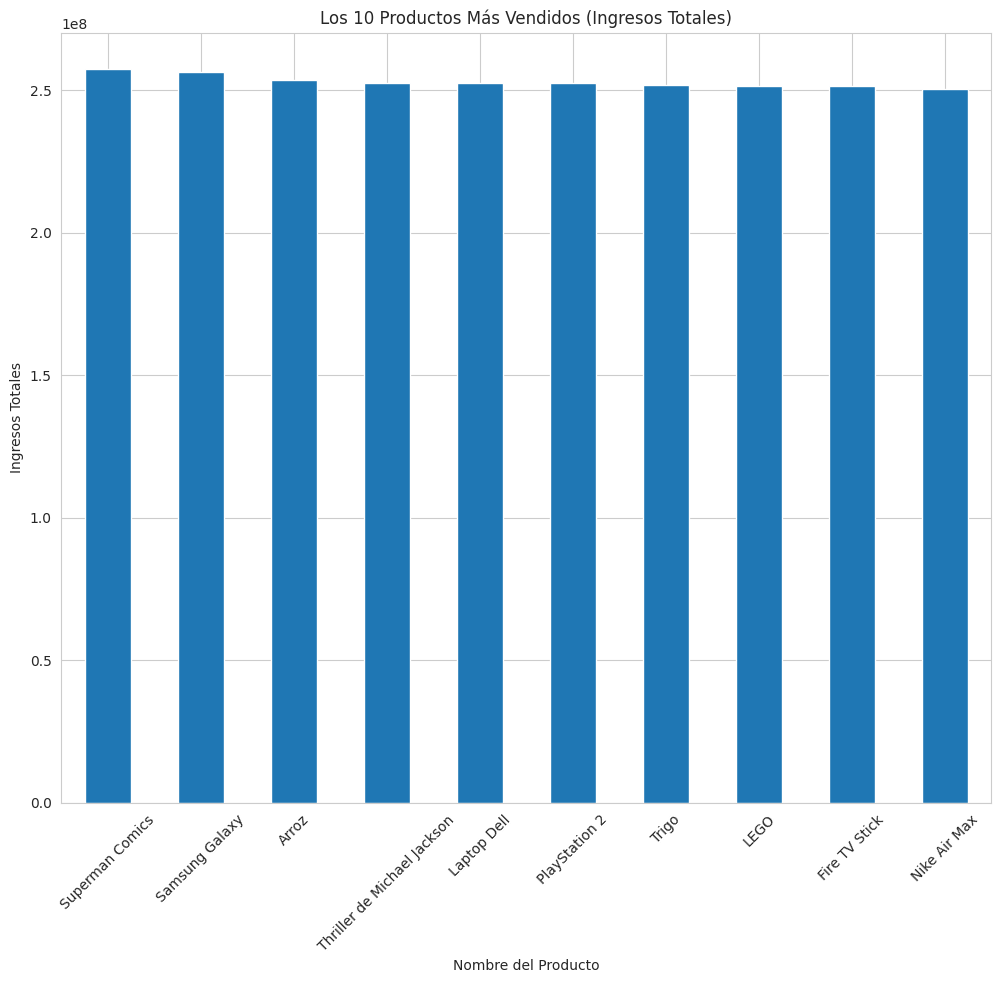

In [169]:
# Visualizar los productos más vendidos
plt.figure(figsize=(12, 10))
productos_mas_vendidos.head(10).plot(kind='bar')
plt.title('Los 10 Productos Más Vendidos (Ingresos Totales)')
plt.xticks(rotation=45)
plt.ylabel('Ingresos Totales')
plt.show()

In [170]:
#Análisis del Comportamiento del Cliente

# Agrupar por región de venta y calcular la cantidad promedio vendida
comportamiento_cliente_region = df.groupby('Región de Venta')['Cantidad Vendida'].mean().sort_values(ascending=False)
print("\nCantidad promedio vendida por región:")
print(comportamiento_cliente_region)


Cantidad promedio vendida por región:
Región de Venta
Comunidad de Madrid           50.884022
Cataluña                      50.808872
Illes Balears                 50.694986
Ciudad Autónoma de Melilla    50.676705
Principado de Asturias        50.668006
Canarias                      50.664366
Cantabria                     50.607987
Ciudad Autónoma de Ceuta      50.577752
Comunitat Valenciana          50.572533
Extremadura                   50.562430
Aragón                        50.537409
Castilla y León               50.463521
Región de Murcia              50.413919
Andalucía                     50.385615
Comunidad Foral de Navarra    50.324610
La Rioja                      50.232454
País Vasco                    50.232061
Galicia                       50.209476
Castilla-La Mancha            50.068430
Name: Cantidad Vendida, dtype: float64


# Conclusiones Iniciales y Próximos Pasos

In [171]:
# Obtener el nombre del producto más vendido y sus ingresos totales
producto_estrella = productos_mas_vendidos.index[0]
ingresos_producto_estrella = productos_mas_vendidos.iloc[0]

# Obtener la región con la mayor cantidad promedio vendida
region_destacada = comportamiento_cliente_region.index[0]
cantidad_promedio_region = comportamiento_cliente_region.iloc[0]

# Calcular la correlación entre la calificación del producto y la cantidad vendida
correlacion_calificacion_cantidad = df['Calificación del Producto'].corr(df['Cantidad Vendida'])

print("\nConclusiones Iniciales:")
print("- Hemos identificado los productos más vendidos y las categorías con mayor demanda.")
print(f"  Nuestro producto estrella es '{producto_estrella}' con ingresos totales de ${ingresos_producto_estrella:,.2f}. Esto indica un fuerte interés del mercado en este producto.")  # Imprime el valor y lo interpreta

print("- Hemos explorado la relación entre la calificación del producto y la cantidad vendida.")
print(f"  La correlación entre la calificación del producto y la cantidad vendida es de {correlacion_calificacion_cantidad:.2f}. Esto sugiere una relación {'positiva' if correlacion_calificacion_cantidad > 0 else 'negativa'} {'débil' if abs(correlacion_calificacion_cantidad) < 0.3 else 'moderada/fuerte'}.")  # Imprime el valor y lo interpreta

print("- Hemos comenzado a analizar el comportamiento del cliente por región.")
print(f"  La región con la mayor cantidad promedio vendida es '{region_destacada}' con un promedio de {cantidad_promedio_region:.2f} unidades por venta. Esto sugiere una mayor penetración de mercado o mayor demanda en esta región.")  # Imprime el valor y lo interpreta

print("\nPróximos Pasos:")
print("- Profundizar en el análisis de la satisfacción del cliente y las devoluciones.")
print("- Segmentar a los clientes según sus patrones de compra.")
print("- Desarrollar modelos de predicción de ventas.")


Conclusiones Iniciales:
- Hemos identificado los productos más vendidos y las categorías con mayor demanda.
  Nuestro producto estrella es 'Superman Comics' con ingresos totales de $257,293,383.96. Esto indica un fuerte interés del mercado en este producto.
- Hemos explorado la relación entre la calificación del producto y la cantidad vendida.
  La correlación entre la calificación del producto y la cantidad vendida es de -0.01. Esto sugiere una relación negativa débil.
- Hemos comenzado a analizar el comportamiento del cliente por región.
  La región con la mayor cantidad promedio vendida es 'Comunidad de Madrid' con un promedio de 50.88 unidades por venta. Esto sugiere una mayor penetración de mercado o mayor demanda en esta región.

Próximos Pasos:
- Profundizar en el análisis de la satisfacción del cliente y las devoluciones.
- Segmentar a los clientes según sus patrones de compra.
- Desarrollar modelos de predicción de ventas.


# TP FINAL DATA II

In [172]:
# Importaciones para Preprocesamiento y Modelado
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [173]:
# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [174]:
# Métricas de Evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [175]:
# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

 ## SECCIÓN 1: PREPROCESAMIENTO DE DATOS

In [176]:
# Convertir 'Fecha de Venta' a datetime
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

In [177]:
# Crear características basadas en la fecha
df['Año de Venta'] = df['Fecha de Venta'].dt.year
df['Mes de Venta'] = df['Fecha de Venta'].dt.month
df['Día de Venta'] = df['Fecha de Venta'].dt.day
df['Día de la Semana Venta'] = df['Fecha de Venta'].dt.dayofweek # Lunes=0, Domingo=6

In [178]:
# Ejemplo de nueva variable: Precio Neto
df['Precio Neto'] = df['Precio Unitario'] - df['Descuento Aplicado']
df['Precio Neto'] = df['Precio Neto'].apply(lambda x: max(0, x)) # Asegurar que no sea negativo

### 1.1 Definición de Variable Objetivo

In [179]:
# Variable Objetivo Predecir si un cliente está satisfecho)
# Binarizamos 'Satisfacción del Cliente': >= 3.5 es Satisfecho (1), else No Satisfecho (0)
df['Cliente Satisfecho'] = (df['Satisfacción del Cliente'] >= 3.5).astype(int)

print("Distribución de la variable objetivo 'Cliente Satisfecho':")
print(df['Cliente Satisfecho'].value_counts(normalize=True))
print("\nNuevas columnas creadas.")
df[['Fecha de Venta', 'Año de Venta', 'Mes de Venta', 'Precio Neto', 'Cliente Satisfecho']].head()

Distribución de la variable objetivo 'Cliente Satisfecho':
Cliente Satisfecho
0    0.6236
1    0.3764
Name: proportion, dtype: float64

Nuevas columnas creadas.


,Fecha de Venta,Año de Venta,Mes de Venta,Precio Neto,Cliente Satisfecho
0,2023-02-27,2023,2,64.94,1
1,2023-09-29,2023,9,166.06,0
2,2021-08-07,2021,8,602.43,0
3,2022-04-02,2022,4,953.88,0
4,2022-01-24,2022,1,249.19,1


### 1.2 Identificación de Tipos de Variables y Selección de Features

In [180]:
# Variable objetivo
TARGET = 'Cliente Satisfecho'


cols_to_drop = [
    "ID del Producto", "Fecha de Venta", "Satisfacción del Cliente", "Calificación del Producto",
    "Motivo de Devolución", "Comentarios del Cliente", "País de Venta", "Ciudad de Venta",
    "Proveedor"
]

df_processed = df.drop(columns=cols_to_drop)

# Identificar características numéricas y categóricas
numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove(TARGET) # Quitar la variable objetivo de las features

categorical_features = df_processed.select_dtypes(include='object').columns.tolist()

print(f"Características Numéricas ({len(numerical_features)}): {numerical_features}")
print(f"Características Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"Variable Objetivo: {TARGET}")

Características Numéricas (14): ['Precio Unitario', 'Cantidad Vendida', 'Ingresos Totales', 'Descuento Aplicado', 'Costo de Envío', 'Tiempo de Entrega (días)', 'Número de Reseñas', 'Stock Disponible', 'Devoluciones', 'Mes de Venta', 'Año de Venta', 'Día de Venta', 'Día de la Semana Venta', 'Precio Neto']
Características Categóricas (7): ['Nombre del Producto', 'Categoría', 'Región de Venta', 'Método de Pago', 'Marca', 'Canal de Venta', 'Plataforma de Venta']
Variable Objetivo: Cliente Satisfecho


### 1.3 Creación de Pipelines de Preprocesamiento

In [181]:
# Pipeline para variables numéricas:
# 1. SimpleImputer: Rellena valores NaN con la mediana.
# 2. StandardScaler: Escala las variables para que tengan media 0 y desviación estándar 1.
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [182]:
# Pipeline para variables categóricas:
# 1. SimpleImputer: Rellena valores NaN con el valor más frecuente.
# 2. OneHotEncoder: Convierte variables categóricas en variables dummy (0s y 1s).
#    handle_unknown='ignore' evita errores si aparecen nuevas categorías en test.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False para PCA
])

In [183]:
# Combinar pipelines usando ColumnTransformer
# Esto aplica las transformaciones correctas a las columnas correctas.
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("Pipelines de preprocesamiento definidos.")


Pipelines de preprocesamiento definidos.


### 1.4 Aplicación del Preprocesamiento y PCA

In [184]:
# Separacion de features (X) y target (y)
X = df_processed.drop(columns=[TARGET])
y = df_processed[TARGET]

# Aplicar el preprocesador
X_processed = preprocessor.fit_transform(X)

# Obtener los nombres de las nuevas columnas después del OneHotEncoding
# Es importante para interpretar PCA o si no se usa PCA.
ohe_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=X.index)
print(f"Dimensiones de X después del preprocesamiento: {X_processed_df.shape}")

# Aplicar PCA
pca = PCA(n_components=min(20, X_processed_df.shape[1])) # No más de 20 componentes, o el max posible

X_pca = pca.fit_transform(X_processed_df)

print(f"Dimensiones de X después de PCA: {X_pca.shape}")
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada por {pca.n_components_} componentes: {sum(pca.explained_variance_ratio_):.4f}")

# Convertir X_pca a DataFrame para usarlo en los modelos
# Los nombres de las columnas serán PC1, PC2, etc.
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_final = pd.DataFrame(X_pca, columns=pca_columns, index=X.index)

X_final.head()

Dimensiones de X después del preprocesamiento: (100000, 76)
Dimensiones de X después de PCA: (100000, 20)
Varianza explicada por cada componente: [0.10343965 0.05897009 0.05260094 0.05248187 0.0520734  0.05191871
 0.05179446 0.05163534 0.05160298 0.05131114 0.05111166 0.05066071
 0.04461506 0.02585672 0.01738104 0.01724396 0.01722493 0.01711567
 0.01302929 0.01292872]
Varianza total explicada por 20 componentes: 0.8450


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-2.013910,-1.018339,0.983659,-0.960778,-0.456093,-2.491901,1.319687,-0.533421,-1.145094,-0.092377,-0.605064,0.072610,-0.579992,-0.702703,-1.025621,0.026298,0.042799,-0.491724,-0.320362,-0.689405
1,-1.531025,0.403719,0.408940,-0.094543,1.195250,-0.208319,-0.057594,-0.700125,0.328688,-0.925613,1.686836,1.503517,0.894692,0.727146,0.126787,0.152037,0.184630,1.135573,-0.280028,-0.700574
2,0.595336,0.691858,-1.328214,-0.710310,-1.243500,1.487582,0.641711,0.202681,0.028487,0.120055,-1.508159,-0.895927,-0.123007,0.664552,-1.042049,0.019101,0.049436,-0.487804,-0.307896,-0.696040
3,2.309694,-0.674741,-0.016826,-1.895757,-1.116751,1.550089,-1.581158,-0.174495,0.574544,-0.518363,0.428214,-1.119370,-0.460039,-0.699534,0.117268,0.164845,0.219198,1.116465,-0.289093,-0.701738
4,-1.106860,-0.765531,1.570107,1.341443,0.403197,0.029174,1.541793,-0.332416,1.784820,-0.033699,-0.650556,-0.898950,-1.329158,0.689999,-0.415336,-0.672935,0.747343,0.303576,-0.320309,-0.682187


### 1.5 División en Conjuntos de Entrenamiento y Prueba

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")
print("\nDistribución de la variable objetivo en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de la variable objetivo en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño de X_train: (80000, 20)
Tamaño de X_test: (20000, 20)
Tamaño de y_train: (80000,)
Tamaño de y_test: (20000,)

Distribución de la variable objetivo en entrenamiento:
Cliente Satisfecho
0    0.6236
1    0.3764
Name: proportion, dtype: float64

Distribución de la variable objetivo en prueba:
Cliente Satisfecho
0    0.6236
1    0.3764
Name: proportion, dtype: float64


## SECCIÓN 2: MÉTRICAS PARA LA SELECCIÓN DEL MEJOR MODELO

In [186]:
def evaluar_modelo(nombre_modelo, modelo, X_test, y_test, y_pred, y_pred_proba):
    """Función para calcular y mostrar métricas de evaluación."""
    print(f"Métricas de Evaluación para: {nombre_modelo}")
    print("---------------------------------------------")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{nombre_modelo} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {nombre_modelo}')
    plt.legend(loc='lower right')
    plt.show()

    # Curva Precision-Recall
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(recall_curve, precision_curve, label=f'{nombre_modelo}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Curva Precision-Recall - {nombre_modelo}')
    plt.legend(loc='lower left')
    plt.show()

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "ROC-AUC": roc_auc}

print("Función de evaluación y métricas definidas.")

# Guarda los resultados de los modelos para compararlos
model_performance = {}

Función de evaluación y métricas definidas.


## SECCIÓN 3: ENTRENAMIENTO Y TESTEO DE 3 MODELOS DISTINTOS

### 3.1 Modelo 1: Regresión Logística

Entrenando Regresión Logística...
Tiempo de entrenamiento: 0.33 segundos
Métricas de Evaluación para: Regresión Logística
---------------------------------------------
Accuracy: 0.6236
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5101

Matriz de Confusión:


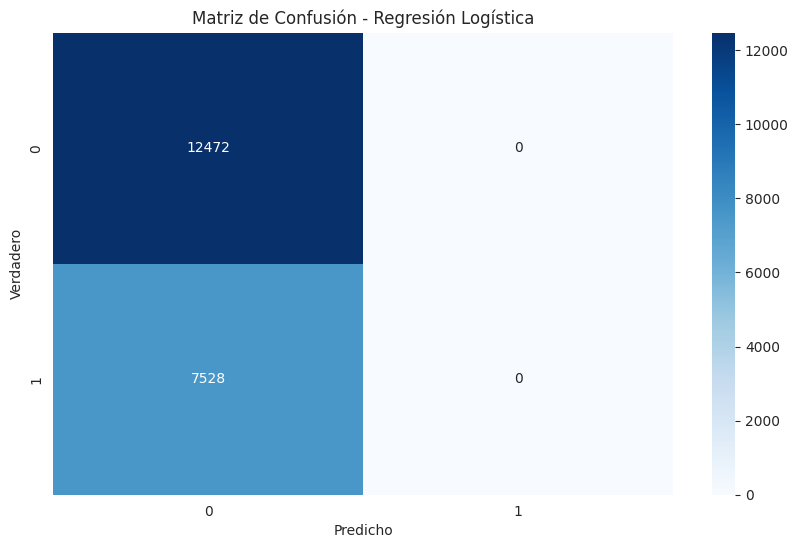


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77     12472
           1       0.00      0.00      0.00      7528

    accuracy                           0.62     20000
   macro avg       0.31      0.50      0.38     20000
weighted avg       0.39      0.62      0.48     20000



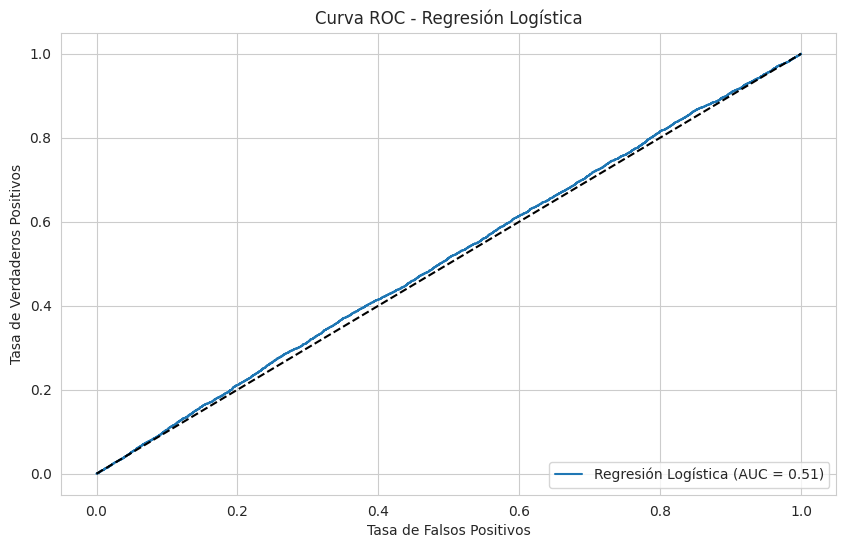

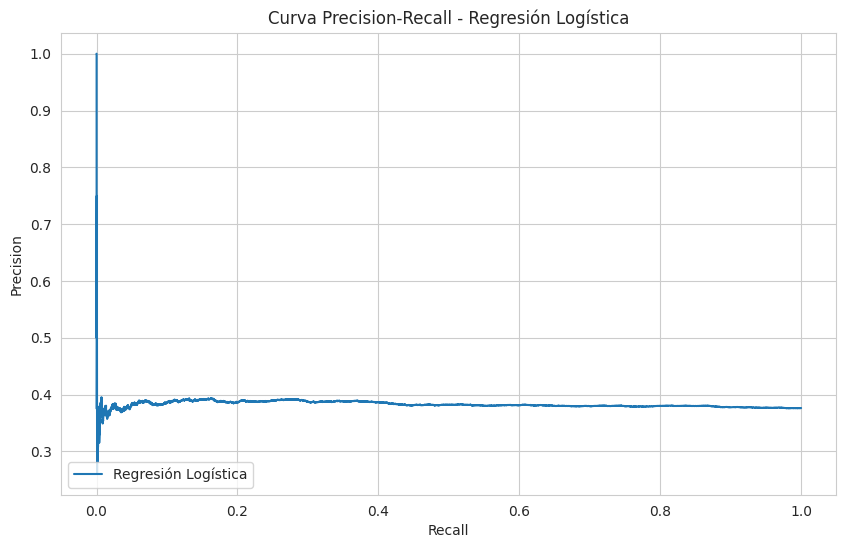

In [187]:
print("Entrenando Regresión Logística...")
start_time = time.time()
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=200) # liblinear es bueno para datasets pequeños/medianos
log_reg.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1] # Probabilidad de la clase positiva

model_performance['Regresión Logística'] = evaluar_modelo("Regresión Logística", log_reg, X_test, y_test, y_pred_log_reg, y_pred_proba_log_reg)


### 3.2 Modelo 2: Random Forest Classifier


Entrenando Random Forest Classifier...
Tiempo de entrenamiento: 106.13 segundos
Métricas de Evaluación para: Random Forest
---------------------------------------------
Accuracy: 0.6179
Precision: 0.3886
Recall: 0.0262
F1-Score: 0.0490
ROC-AUC: 0.5032

Matriz de Confusión:


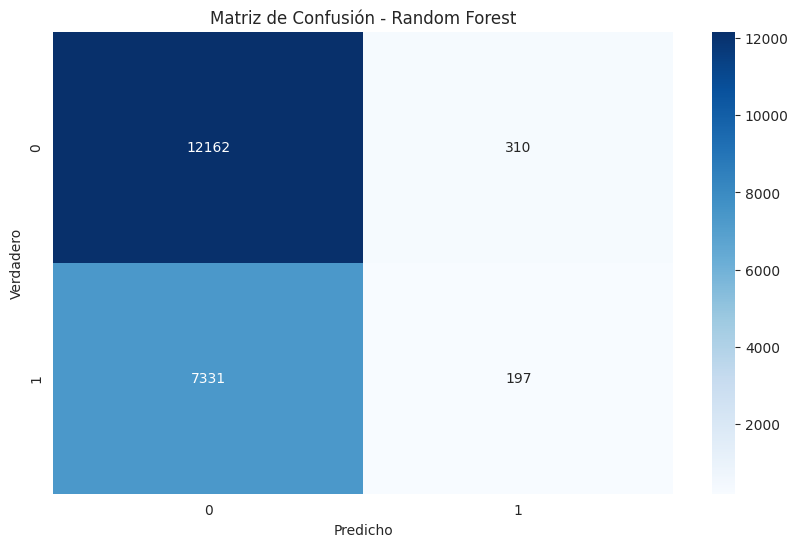


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76     12472
           1       0.39      0.03      0.05      7528

    accuracy                           0.62     20000
   macro avg       0.51      0.50      0.40     20000
weighted avg       0.54      0.62      0.49     20000



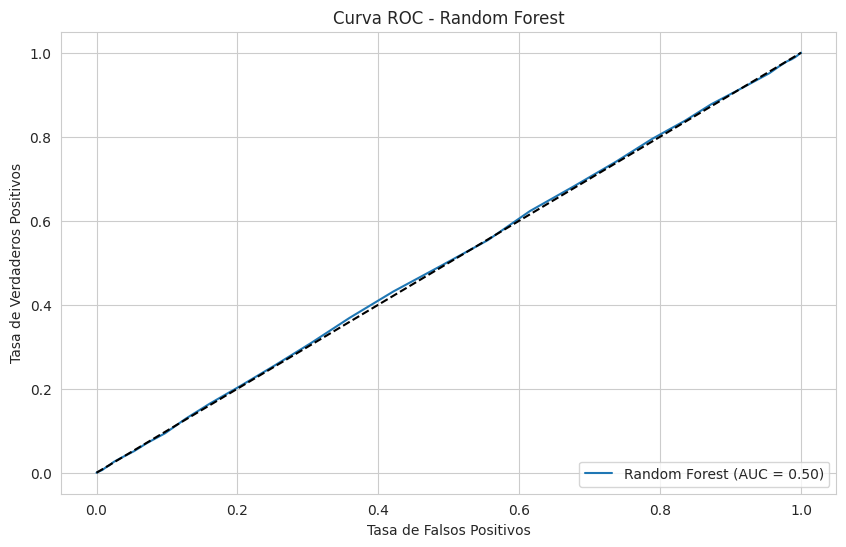

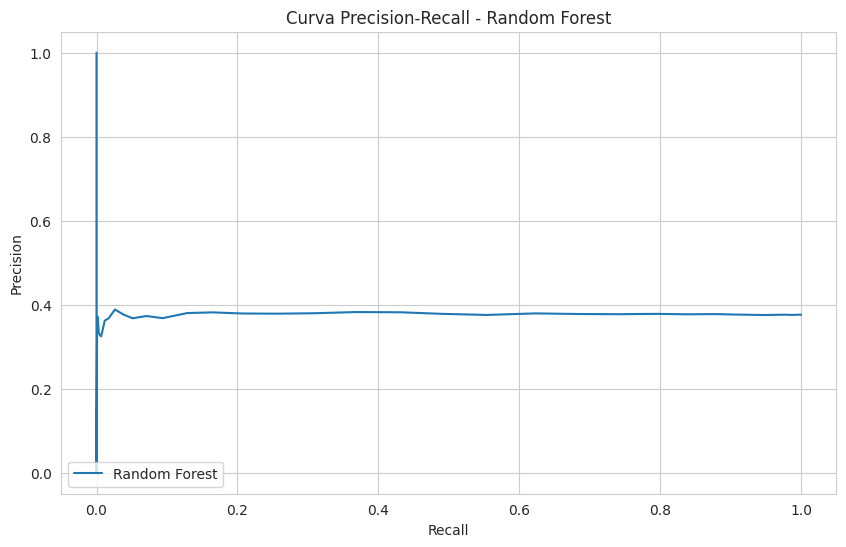

In [188]:
# Random Forest  ensamble por Bagging.
print("\nEntrenando Random Forest Classifier...")
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 usa todos los procesadores
rf_clf.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

model_performance['Random Forest'] = evaluar_modelo("Random Forest", rf_clf, X_test, y_test, y_pred_rf, y_pred_proba_rf)

### 3.3 Modelo 3: Gradient Boosting Classifier


Entrenando Gradient Boosting Classifier...
Tiempo de entrenamiento: 125.61 segundos
Métricas de Evaluación para: Gradient Boosting
---------------------------------------------
Accuracy: 0.6231
Precision: 0.3684
Recall: 0.0019
F1-Score: 0.0037
ROC-AUC: 0.5079

Matriz de Confusión:


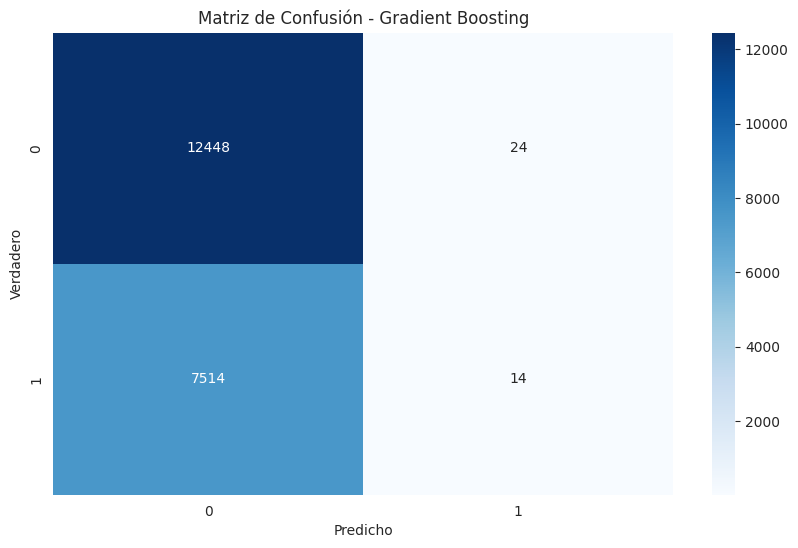


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77     12472
           1       0.37      0.00      0.00      7528

    accuracy                           0.62     20000
   macro avg       0.50      0.50      0.39     20000
weighted avg       0.53      0.62      0.48     20000



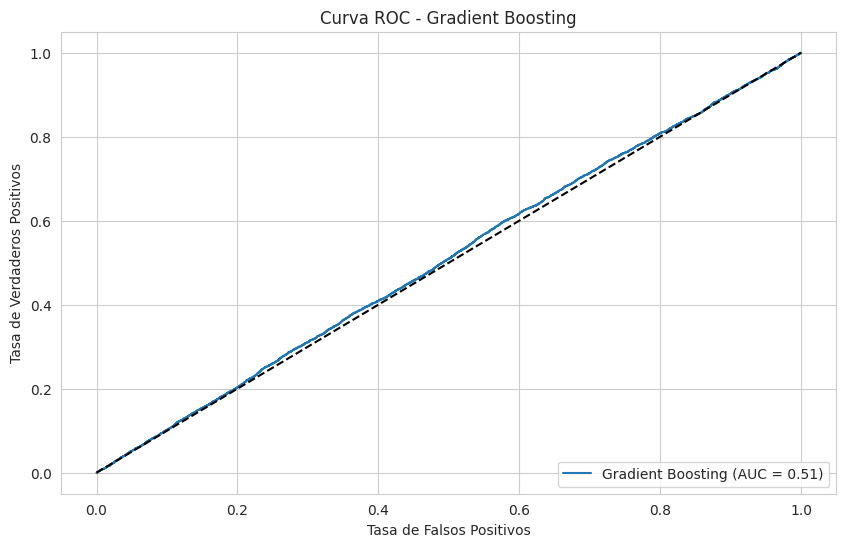

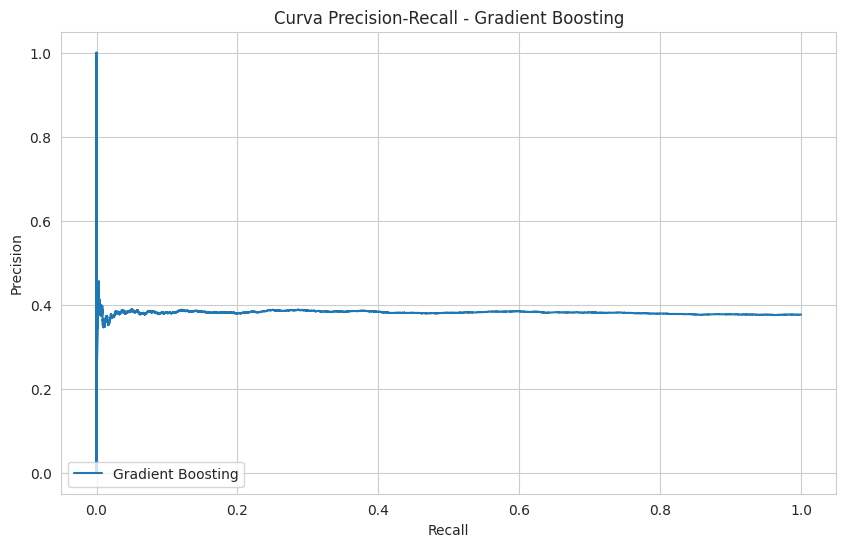

In [189]:
# Gradient Boosting  ensamble por Boosting.
print("\nEntrenando Gradient Boosting Classifier...")
start_time = time.time()
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

y_pred_gb = gb_clf.predict(X_test)
y_pred_proba_gb = gb_clf.predict_proba(X_test)[:, 1]

model_performance['Gradient Boosting'] = evaluar_modelo("Gradient Boosting", gb_clf, X_test, y_test, y_pred_gb, y_pred_proba_gb)


In [190]:
# Comparación de rendimiento de los modelos
performance_df = pd.DataFrame(model_performance).T
print("\nResumen del Rendimiento de los Modelos:")
print(performance_df.sort_values(by="ROC-AUC", ascending=False))


Resumen del Rendimiento de los Modelos:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Regresión Logística   0.62360   0.000000  0.000000  0.000000  0.510062
Gradient Boosting     0.62310   0.368421  0.001860  0.003701  0.507942
Random Forest         0.61795   0.388560  0.026169  0.049035  0.503247


## SECCIÓN 4: TÉCNICAS DE VALIDACIÓN

### 4.1 K-Fold Cross-Validation

In [191]:
print("Ejecutando K-Fold Cross-Validation (con Random Forest)...")


kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Usamos 'roc_auc' como métrica de scoring, podría ser 'accuracy', 'f1', etc.
# X_final son los datos con PCA, y 'y' es la variable objetivo original.
scores_kfold = cross_val_score(rf_clf, X_final, y, cv=kf, scoring='roc_auc', n_jobs=-1)

print(f"Puntuaciones ROC-AUC para cada fold (K-Fold): {scores_kfold}")
print(f"ROC-AUC Media (K-Fold): {scores_kfold.mean():.4f} (+/- {scores_kfold.std():.4f})")


Ejecutando K-Fold Cross-Validation (con Random Forest)...
Puntuaciones ROC-AUC para cada fold (K-Fold): [0.49366586 0.50309362 0.50151606 0.50055176 0.50055141]
ROC-AUC Media (K-Fold): 0.4999 (+/- 0.0032)


### 4.2 Stratified K-Fold Cross-Validation

In [192]:
# Util si hay desbalance de clases.
print("\nEjecutando Stratified K-Fold Cross-Validation (con Random Forest)...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_skfold = cross_val_score(rf_clf, X_final, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"Puntuaciones ROC-AUC para cada fold (Stratified K-Fold): {scores_skfold}")
print(f"ROC-AUC Media (Stratified K-Fold): {scores_skfold.mean():.4f} (+/- {scores_skfold.std():.4f})")



Ejecutando Stratified K-Fold Cross-Validation (con Random Forest)...
Puntuaciones ROC-AUC para cada fold (Stratified K-Fold): [0.49380577 0.50708742 0.50462439 0.4982086  0.49476079]
ROC-AUC Media (Stratified K-Fold): 0.4997 (+/- 0.0053)


### 4.3 Leave-One-Out Cross-Validation (LOOCV) - Mención

In [193]:
# Texto Informativo
# LOOCV es K-Fold con K = N (número de muestras).
# Es decir, para un dataset de 100k muestras, entrenaría 100k modelos.
# Esto es computacionalmente prohibitivo para nuestro dataset.
# loocv = LeaveOneOut()
# Si el dataset fuera pequeño (ej. < 1000 muestras), podría ser viable:
# scores_loocv = cross_val_score(rf_clf, X_final_small, y_small, cv=loocv, scoring='roc_auc', n_jobs=-1)
# print(f"ROC-AUC Media (LOOCV): {scores_loocv.mean():.4f}")
print("\nLeave-One-Out Cross-Validation (LOOCV) es computacionalmente intensivo para este dataset.")
print("Se recomienda para datasets mucho más pequeños.")


Leave-One-Out Cross-Validation (LOOCV) es computacionalmente intensivo para este dataset.
Se recomienda para datasets mucho más pequeños.


## SECCIÓN 5: TÉCNICAS DE OPTIMIZACIÓN DE HIPERPARÁMETROS

In [195]:
sample_size = 5000 # Ajustar según el tiempo disponible
if len(X_train) > sample_size:
    X_train_sample, _, y_train_sample, _ = train_test_split(
        X_train, y_train, train_size=sample_size, random_state=42, stratify=y_train
    )
else:
    X_train_sample, y_train_sample = X_train, y_train

print(f"Usando una muestra de {len(X_train_sample)} datos para optimización de hiperparámetros.")


Usando una muestra de 5000 datos para optimización de hiperparámetros.


### 5.1 GridSearchCV con Random Forest

In [196]:
print("\nEjecutando GridSearchCV para Random Forest...")
param_grid_rf = {
    'n_estimators': [50, 100], # Número de árboles
    'max_depth': [None, 10, 20], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5], # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]   # Mínimo de muestras en una hoja
}

# Uso de StratifiedKFold para la validación cruzada dentro de GridSearchCV
cv_stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=cv_stratified, # Uso de StratifiedKFold
    scoring='roc_auc',
    verbose=1, # Mostrar progreso
    n_jobs=-1 # Usar todos los procesadores si es posible
)

start_time = time.time()
grid_search_rf.fit(X_train_sample, y_train_sample)
end_time = time.time()
print(f"Tiempo de GridSearchCV: {end_time - start_time:.2f} segundos")

print("Mejores hiperparámetros (GridSearchCV):", grid_search_rf.best_params_)
print("Mejor ROC-AUC (GridSearchCV):", grid_search_rf.best_score_)




Ejecutando GridSearchCV para Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Tiempo de GridSearchCV: 96.37 segundos
Mejores hiperparámetros (GridSearchCV): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mejor ROC-AUC (GridSearchCV): 0.5069463187173927


Métricas de Evaluación para: Random Forest (GridSearch)
---------------------------------------------
Accuracy: 0.6213
Precision: 0.3203
Recall: 0.0054
F1-Score: 0.0107
ROC-AUC: 0.5011

Matriz de Confusión:


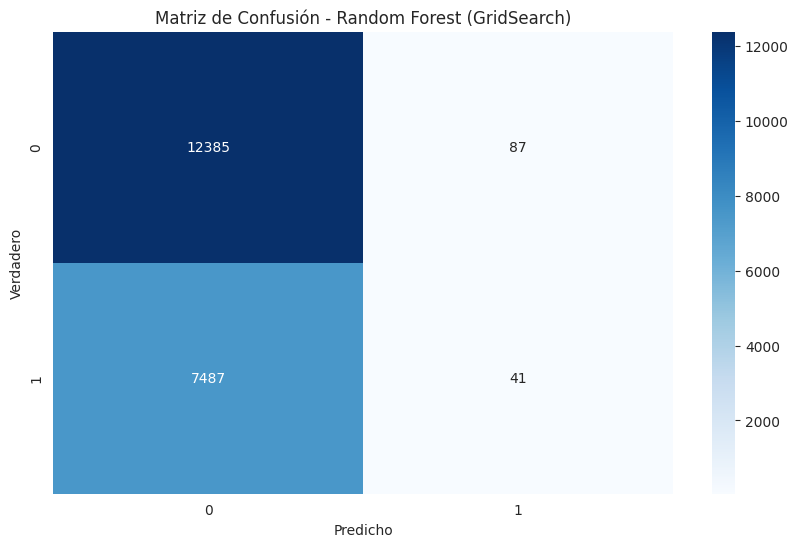


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.99      0.77     12472
           1       0.32      0.01      0.01      7528

    accuracy                           0.62     20000
   macro avg       0.47      0.50      0.39     20000
weighted avg       0.51      0.62      0.48     20000



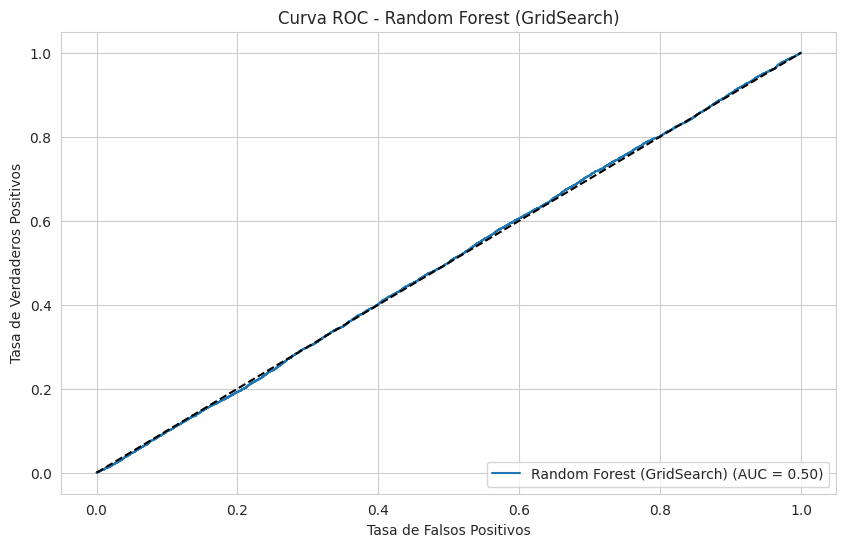

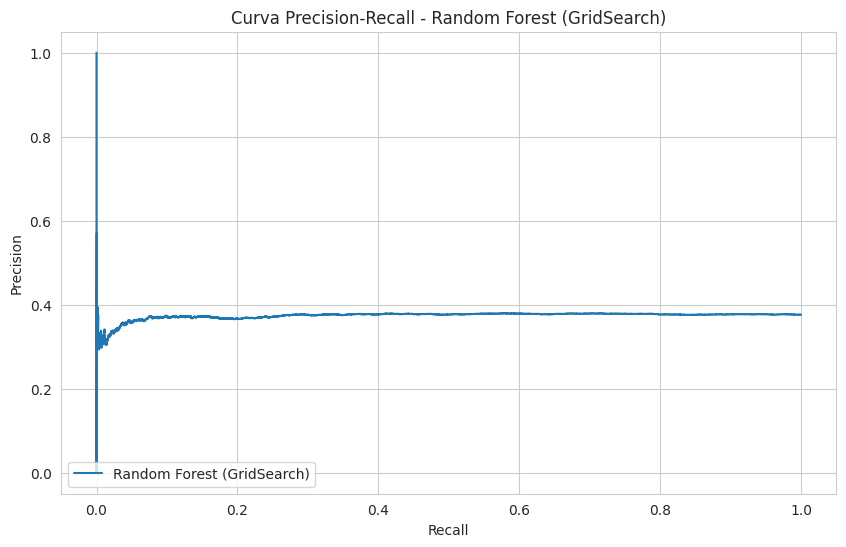

In [197]:
# Evaluacion del mejor modelo de GridSearchCV en el conjunto de test
best_rf_grid = grid_search_rf.best_estimator_
y_pred_best_rf_grid = best_rf_grid.predict(X_test)
y_pred_proba_best_rf_grid = best_rf_grid.predict_proba(X_test)[:, 1]
model_performance['Random Forest (GridSearch)'] = evaluar_modelo("Random Forest (GridSearch)", best_rf_grid, X_test, y_test, y_pred_best_rf_grid, y_pred_proba_best_rf_grid)

### 5.2 RandomizedSearchCV con Random Forest

In [198]:
print("\nEjecutando RandomizedSearchCV para Random Forest...")
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=5)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False] # Muestreo con o sin reemplazo
}

# n_iter controla cuántas combinaciones aleatorias se prueban
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=10, # Probar 10 combinaciones. Aumentar para mejor búsqueda.
    cv=cv_stratified, # Usar StratifiedKFold
    scoring='roc_auc',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
random_search_rf.fit(X_train_sample, y_train_sample)
end_time = time.time()
print(f"Tiempo de RandomizedSearchCV: {end_time - start_time:.2f} segundos")

print("Mejores hiperparámetros (RandomizedSearchCV):", random_search_rf.best_params_)
print("Mejor ROC-AUC (RandomizedSearchCV):", random_search_rf.best_score_)



Ejecutando RandomizedSearchCV para Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tiempo de RandomizedSearchCV: 82.84 segundos
Mejores hiperparámetros (RandomizedSearchCV): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Mejor ROC-AUC (RandomizedSearchCV): 0.4959277749872218


Métricas de Evaluación para: Random Forest (RandomSearch)
---------------------------------------------
Accuracy: 0.6078
Precision: 0.3989
Recall: 0.0830
F1-Score: 0.1374
ROC-AUC: 0.5028

Matriz de Confusión:


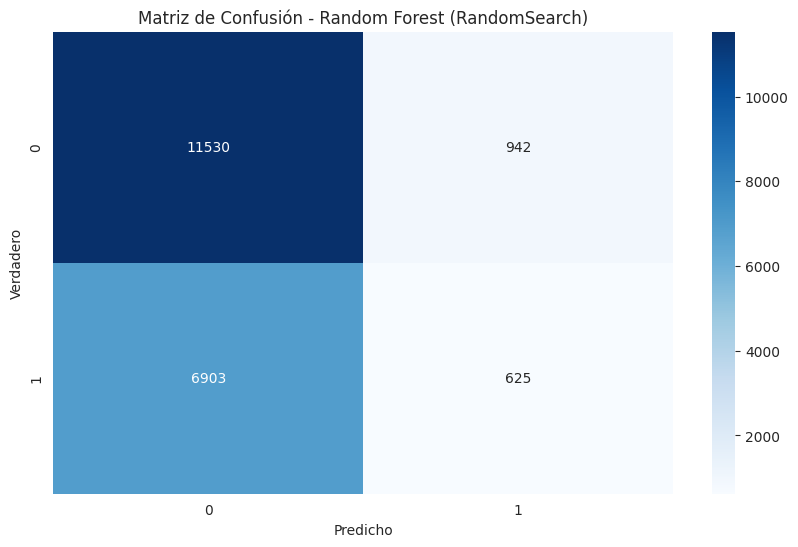


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75     12472
           1       0.40      0.08      0.14      7528

    accuracy                           0.61     20000
   macro avg       0.51      0.50      0.44     20000
weighted avg       0.54      0.61      0.52     20000



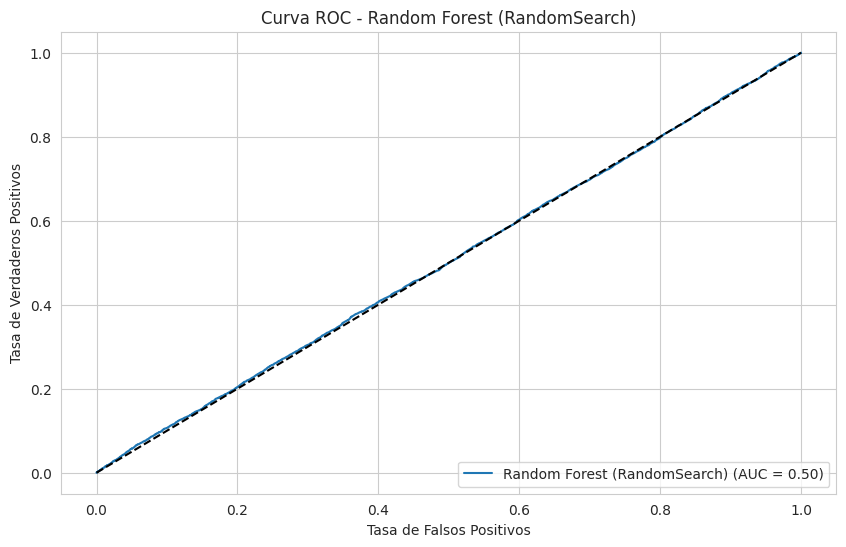

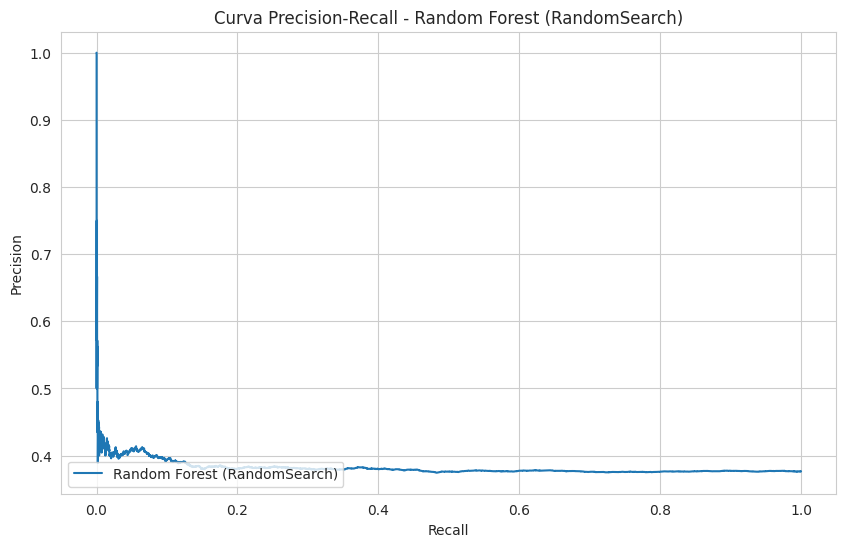

In [199]:
# Evaluacion del mejor modelo de RandomizedSearchCV en el conjunto de test
best_rf_random = random_search_rf.best_estimator_
y_pred_best_rf_random = best_rf_random.predict(X_test)
y_pred_proba_best_rf_random = best_rf_random.predict_proba(X_test)[:, 1]
model_performance['Random Forest (RandomSearch)'] = evaluar_modelo("Random Forest (RandomSearch)", best_rf_random, X_test, y_test, y_pred_best_rf_random, y_pred_proba_best_rf_random)

## SECCIÓN 6: MÉTODOS DE ENSAMBLE (BOOSTING O BAGGING)

In [201]:
print("Los modelos Random Forest (Bagging) y Gradient Boosting (Boosting) ya fueron implementados y evaluados.")
print("Random Forest es un ejemplo de ensamble por Bagging.")
print("Gradient Boosting es un ejemplo de ensamble por Boosting.")

# Mostrar el rendimiento actualizado, incluyendo los modelos optimizados
performance_df_updated = pd.DataFrame(model_performance).T
print("\nResumen del Rendimiento de los Modelos (incluyendo optimizados):")
print(performance_df_updated.sort_values(by="ROC-AUC", ascending=False))



Los modelos Random Forest (Bagging) y Gradient Boosting (Boosting) ya fueron implementados y evaluados.
Random Forest es un ejemplo de ensamble por Bagging.
Gradient Boosting es un ejemplo de ensamble por Boosting.

Resumen del Rendimiento de los Modelos (incluyendo optimizados):
                              Accuracy  Precision    Recall  F1-Score  \
Regresión Logística            0.62360   0.000000  0.000000  0.000000   
Gradient Boosting              0.62310   0.368421  0.001860  0.003701   
Random Forest                  0.61795   0.388560  0.026169  0.049035   
Random Forest (RandomSearch)   0.60775   0.398851  0.083023  0.137438   
Random Forest (GridSearch)     0.62130   0.320312  0.005446  0.010711   

                               ROC-AUC  
Regresión Logística           0.510062  
Gradient Boosting             0.507942  
Random Forest                 0.503247  
Random Forest (RandomSearch)  0.502759  
Random Forest (GridSearch)    0.501068  


## 7- GENERA PDF DE INFORME FINAL

In [202]:
# Importaciones necesarias para el PDF
from fpdf import FPDF
import datetime
import shutil # Para eliminar el directorio temporal de gráficos
import pandas as pd # Asegurarse que pandas esté importado si no lo está globalmente
import numpy as np  # Asegurarce que numpy esté importado si no lo está globalmente
import matplotlib.pyplot as plt # Asegurarce que matplotlib esté importado
import seaborn as sns # Asegurarse que seaborn esté importado

# --- ASEGÚRASE QUE ESTAS VARIABLES ESTÉN DEFINIDAS ANTES DE ESTA SECCIÓN ---
# --- O DESCOMENTAR Y USAR EL SIGUIENTE BLOQUE DE EJEMPLO PARA PRUEBAS ---
if 'producto_estrella' not in globals() or \
   'ingresos_producto_estrella' not in globals() or \
   'region_destacada' not in globals() or \
   'cantidad_promedio_region' not in globals() or \
   'correlacion_calificacion_cantidad' not in globals():
    print("ADVERTENCIA: Variables del EDA no encontradas. Usando valores de ejemplo para el PDF.")
    # Simular que estas variables vienen de tu análisis exploratorio
    # productos_mas_vendidos_ej = pd.Series({'Minecraft': 500000.75, 'PlayStation 2': 450000.20}, name='Ingresos Totales')
    # comportamiento_cliente_region_ej = pd.Series({'North America': 55.5, 'Europe': 50.2}, name='Cantidad Vendida Promedio')
    # df_ejemplo_corr = pd.DataFrame({ # Necesitas un df con estas columnas para .corr()
    # 'Calificación del Producto': np.random.rand(100) * 4 + 1,
    # 'Cantidad Vendida': np.random.randint(1, 100, 100)
    # })
    # correlacion_calificacion_cantidad_ej = df_ejemplo_corr['Calificación del Producto'].corr(df_ejemplo_corr['Cantidad Vendida'])

    # Usando valores fijos para el ejemplo si la simulación anterior falla o es compleja
    producto_estrella = "Producto Ejemplo Alpha"
    ingresos_producto_estrella = 750000.50
    region_destacada = "Región Ejemplo Zeta"
    cantidad_promedio_region = 62.75
    correlacion_calificacion_cantidad = 0.45
# --- FIN DEL BLOQUE  ---


# Definicion de una clase PDF personalizada para manejar los encabezados y pies de página si es necesario
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Informe de Análisis de Ventas y Satisfacción del Cliente', 0, 1, 'C')
        self.ln(5)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')

pdf = PDF(orientation='P', unit='mm', format='A4')
pdf.add_page()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.set_font('Arial', '', 10)

# --- Directorio temporal para guardar gráficos ---
temp_plots_dir = "temp_pdf_plots"
if os.path.exists(temp_plots_dir):
    shutil.rmtree(temp_plots_dir) # Limpiar si existe de una ejecución anterior
os.makedirs(temp_plots_dir, exist_ok=True)

# --- Helper funcion para el PDF ---
def add_section_title(pdf_obj, title):
    pdf_obj.set_font('Arial', 'B', 14)
    pdf_obj.ln(10)
    pdf_obj.cell(0, 10, title, 0, 1, 'L')
    pdf_obj.set_font('Arial', '', 10)
    pdf_obj.ln(2)

def add_subsection_title(pdf_obj, title):
    pdf_obj.set_font('Arial', 'B', 12)
    pdf_obj.ln(5)
    pdf_obj.cell(0, 8, title, 0, 1, 'L')
    pdf_obj.set_font('Arial', '', 10)
    pdf_obj.ln(1)

def add_paragraph(pdf_obj, text, align='L'):
    pdf_obj.multi_cell(0, 5, text, align=align)
    pdf_obj.ln(2)

def save_current_plot_and_add_to_pdf(pdf_obj, filename_base, caption="", width_percentage=0.8):
    plot_path = os.path.join(temp_plots_dir, f"{filename_base}.png")
    plt.savefig(plot_path, bbox_inches='tight', dpi=150)
    plt.close() # Cerrar la figuracion para liberar memoria y evitar que se muestre en el notebook aquí

    page_width_mm = pdf_obj.w - 2 * pdf_obj.l_margin
    image_width_mm = page_width_mm * width_percentage
    pdf_obj.image(plot_path, w=image_width_mm)
    if caption:
        pdf_obj.set_font('Arial', 'I', 9)
        pdf_obj.cell(0, 5, caption, 0, 1, 'C')
        pdf_obj.set_font('Arial', '', 10)
    pdf_obj.ln(3)

# --- Contenido del PDF ---

# 1. Resumen Ejecutivo / Introducción
add_section_title(pdf, "1. Resumen Ejecutivo")
intro_text = (
    f"Fecha del Informe: {datetime.date.today().strftime('%Y-%m-%d')}\n"
    "Este informe presenta un análisis de los datos de ventas con el objetivo principal de predecir la "
    "satisfacción del cliente. Se exploraron diversos modelos de Machine Learning, se evaluó su rendimiento "
    "y se optimizaron los hiperparámetros del modelo más prometedor. Adicionalmente, se incluyen hallazgos "
    "clave del análisis exploratorio de datos."
)
add_paragraph(pdf, intro_text)

# 2. Datos Utilizados
add_section_title(pdf, "2. Datos Utilizados")
# Asegurarse que 'df' y 'y' estén definidos del script principal.
df_shape_0 = df.shape[0] if 'df' in globals() else "N/A"
df_shape_1 = df.shape[1] if 'df' in globals() else "N/A"
y_value_counts_str = y.value_counts(normalize=True).to_string() if 'y' in globals() else "N/A"

data_desc_text = (
    f"El análisis se basó en un conjunto de datos sintético de {df_shape_0} registros de ventas, "
    f"conteniendo {df_shape_1} características iniciales por registro. Las características incluyen "
    "detalles del producto, información de ventas, demografía del cliente (simulada) y métricas de satisfacción."
    f"\nLa variable objetivo fue 'Cliente Satisfecho', donde 1 indica un cliente satisfecho (calificación >= 3.5) y 0 uno no satisfecho."
)
add_paragraph(pdf, data_desc_text)
add_paragraph(pdf, f"Distribución de 'Cliente Satisfecho':\n{y_value_counts_str}")


# 3. Metodología
add_section_title(pdf, "3. Metodología Aplicada")
add_subsection_title(pdf, "3.1. Preprocesamiento de Datos")
# Asegurarse que X_final y pca estén definidos.
x_final_shape_1 = X_final.shape[1] if 'X_final' in globals() else "N/A"
pca_variance_ratio_sum = sum(pca.explained_variance_ratio_)*100 if 'pca' in globals() else "N/A"

preproc_text = (
    "El preprocesamiento incluyó:\n"
    "- Creación de nuevas variables a partir de la fecha de venta y precios.\n"
    "- Identificación y separación de variables numéricas y categóricas.\n"
    "- Imputación de valores faltantes (mediana para numéricas, más frecuente para categóricas).\n"
    "- Escalado de variables numéricas (StandardScaler).\n"
    "- Codificación de variables categóricas (One-Hot Encoding).\n"
    f"- Reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA), "
    f"resultando en {x_final_shape_1} componentes que explican aproximadamente el "
    f"{pca_variance_ratio_sum:.1f}% de la varianza." if isinstance(pca_variance_ratio_sum, float) else
    f"resultando en {x_final_shape_1} componentes (varianza de PCA no disponible)."
)
add_paragraph(pdf, preproc_text)

add_subsection_title(pdf, "3.2. Modelos Entrenados y Evaluación")
models_text = (
    "Se entrenaron y evaluaron los siguientes modelos de clasificación:\n"
    "- Regresión Logística\n"
    "- Random Forest Classifier\n"
    "- Gradient Boosting Classifier\n\n"
    "Las métricas clave para la evaluación incluyeron Accuracy, Precision, Recall, F1-Score y ROC-AUC. "
    "Los datos se dividieron en conjuntos de entrenamiento (80%) y prueba (20%)."
)
add_paragraph(pdf, models_text)

# 4. Resultados y Discusión
add_section_title(pdf, "4. Resultados del Modelado Predictivo")

add_subsection_title(pdf, "4.1. Comparación del Rendimiento de Modelos")
if 'performance_df_updated' in globals():
    pdf.set_font('Courier', '', 8)
    add_paragraph(pdf, "Tabla de Rendimiento de Modelos (Ordenado por ROC-AUC Descendente):\n" +
                  performance_df_updated.sort_values(by="ROC-AUC", ascending=False).to_string())
    pdf.set_font('Arial', '', 10)
    pdf.ln(3)

    best_model_name_overall = performance_df_updated.sort_values(by="ROC-AUC", ascending=False).index[0]
    best_model_roc_auc_overall = performance_df_updated.sort_values(by="ROC-AUC", ascending=False).iloc[0]['ROC-AUC']
    add_paragraph(pdf, f"El modelo con mejor rendimiento general para predecir la satisfacción del cliente fue '{best_model_name_overall}' "
                       f"con un ROC-AUC de {best_model_roc_auc_overall:.4f} en el conjunto de prueba.")
else:
    add_paragraph(pdf, "No se encontró el DataFrame 'performance_df_updated' con el resumen del rendimiento de modelos.")


add_subsection_title(pdf, "4.2. Análisis del Mejor Modelo Seleccionado")
selected_model_for_detail = None
selected_model_name_for_detail = ""
y_pred_selected = None
y_pred_proba_selected = None

if 'performance_df_updated' in globals():
    best_overall_model_name = performance_df_updated.sort_values(by="ROC-AUC", ascending=False).index[0]
    # Lógica para seleccionar el mejor modelo y sus predicciones (adaptadas al código)
    if 'Random Forest (RandomSearch)' in model_performance and 'Random Forest (RandomSearch)' == best_overall_model_name :
        selected_model_for_detail = best_rf_random
        selected_model_name_for_detail = "Random Forest (Optimizado con RandomSearch)"
        y_pred_selected = y_pred_best_rf_random
        y_pred_proba_selected = y_pred_proba_best_rf_random
    elif 'Random Forest (GridSearch)' in model_performance and 'Random Forest (GridSearch)' == best_overall_model_name:
        selected_model_for_detail = best_rf_grid
        selected_model_name_for_detail = "Random Forest (Optimizado con GridSearchCV)"
        y_pred_selected = y_pred_best_rf_grid
        y_pred_proba_selected = y_pred_proba_best_rf_grid
    # Añadir más elif para otros modelos base.
    elif 'Gradient Boosting' in model_performance and 'Gradient Boosting' == best_overall_model_name:
        selected_model_for_detail = gb_clf
        selected_model_name_for_detail = "Gradient Boosting (Base)"
        y_pred_selected = y_pred_gb
        y_pred_proba_selected = y_pred_proba_gb
    elif 'Random Forest' in model_performance and 'Random Forest' == best_overall_model_name:
        selected_model_for_detail = rf_clf
        selected_model_name_for_detail = "Random Forest (Base)"
        y_pred_selected = y_pred_rf
        y_pred_proba_selected = y_pred_proba_rf
    elif 'Regresión Logística' in model_performance and 'Regresión Logística' == best_overall_model_name:
        selected_model_for_detail = log_reg
        selected_model_name_for_detail = "Regresión Logística (Base)"
        y_pred_selected = y_pred_log_reg
        y_pred_proba_selected = y_pred_proba_log_reg


if selected_model_for_detail is not None and 'y_test' in globals() and y_pred_selected is not None and y_pred_proba_selected is not None:
    add_paragraph(pdf, f"Análisis detallado para el modelo: {selected_model_name_for_detail}")
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_selected)
    plt.figure(figsize=(6,4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Satisfecho', 'Satisfecho'], yticklabels=['No Satisfecho', 'Satisfecho'])
    plt.title(f'Matriz de Confusión - {selected_model_name_for_detail}'); plt.xlabel('Predicho'); plt.ylabel('Verdadero')
    save_current_plot_and_add_to_pdf(pdf, "confusion_matrix_best_model", caption=f"Matriz de Confusión ({selected_model_name_for_detail})", width_percentage=0.6)
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_selected); roc_auc_val = roc_auc_score(y_test, y_pred_proba_selected)
    plt.figure(figsize=(6,4)); plt.plot(fpr, tpr, label=f'{selected_model_name_for_detail} (AUC = {roc_auc_val:.2f})'); plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos'); plt.ylabel('Tasa de Verdaderos Positivos'); plt.title(f'Curva ROC - {selected_model_name_for_detail}'); plt.legend(loc='lower right')
    save_current_plot_and_add_to_pdf(pdf, "roc_curve_best_model", caption=f"Curva ROC ({selected_model_name_for_detail})", width_percentage=0.7)
    # Reporte de clasificación
    class_report_str = classification_report(y_test, y_pred_selected, zero_division=0)
    add_paragraph(pdf, "Reporte de Clasificación del Mejor Modelo:")
    pdf.set_font('Courier', '', 8); add_paragraph(pdf, class_report_str); pdf.set_font('Arial', '', 10)
else:
    add_paragraph(pdf, "No se pudo determinar un 'mejor modelo' específico o faltan datos para el análisis detallado de los gráficos.")

add_subsection_title(pdf, "4.3. Validación Cruzada y Optimización de Hiperparámetros")
scores_skfold_mean = scores_skfold.mean() if 'scores_skfold' in globals() else "N/A"
scores_skfold_std = scores_skfold.std() if 'scores_skfold' in globals() else "N/A"

validation_text = (
    "Se utilizó validación cruzada (Stratified K-Fold con 5 pliegues) para obtener una estimación más "
    "robusta del rendimiento. Para el modelo Random Forest, la media de ROC-AUC con Stratified K-Fold fue de "
    f"{scores_skfold_mean:.4f} (+/- {scores_skfold_std:.4f}).\n\n" if isinstance(scores_skfold_mean, float) else
    "No se pudieron mostrar los resultados de Stratified K-Fold.\n\n"
    "Se realizaron técnicas de optimización de hiperparámetros (GridSearchCV y RandomizedSearchCV) "
    "para el modelo Random Forest en una muestra de los datos de entrenamiento."
)
add_paragraph(pdf, validation_text)
if 'grid_search_rf' in globals() and hasattr(grid_search_rf, 'best_params_'):
    add_paragraph(pdf, f"Mejores parámetros con GridSearchCV: {grid_search_rf.best_params_} "
                       f"(ROC-AUC en validación: {grid_search_rf.best_score_:.4f})")
if 'random_search_rf' in globals() and hasattr(random_search_rf, 'best_params_'):
    add_paragraph(pdf, f"Mejores parámetros con RandomizedSearchCV: {random_search_rf.best_params_} "
                       f"(ROC-AUC en validación: {random_search_rf.best_score_:.4f})")

# 5. Conclusiones y Recomendaciones
add_section_title(pdf, "5. Conclusiones y Recomendaciones")

add_subsection_title(pdf, "5.1 Hallazgos Clave del Análisis Exploratorio")
# --- Interpretación de la correlación ---
correl_interpretacion = ""
if abs(correlacion_calificacion_cantidad) < 0.1:
    correl_interpretacion = "casi nula (o muy débil)"
elif abs(correlacion_calificacion_cantidad) < 0.3:
    correl_interpretacion = f"{'positiva' if correlacion_calificacion_cantidad > 0 else 'negativa'} débil"
elif abs(correlacion_calificacion_cantidad) < 0.7:
    correl_interpretacion = f"{'positiva' if correlacion_calificacion_cantidad > 0 else 'negativa'} moderada"
else:
    correl_interpretacion = f"{'positiva' if correlacion_calificacion_cantidad > 0 else 'negativa'} fuerte"

eda_findings_text = (
    f"- Producto Estrella: El análisis identificó a '{producto_estrella}' como el producto con mayores ingresos, "
    f"alcanzando un total de ${ingresos_producto_estrella:,.2f}. Este producto representa una oportunidad clave "
    "y debe ser un foco en las estrategias de marketing y ventas.\n\n"
    f"- Comportamiento Regional Destacado: La región de '{region_destacada}' exhibe la mayor cantidad promedio "
    f"vendida por transacción, con un promedio de {cantidad_promedio_region:.2f} unidades. Esto sugiere una "
    "fuerte demanda o una penetración de mercado exitosa en esta área, que podría replicarse en otras regiones.\n\n"
    f"- Relación entre Calificación y Ventas: Se observó una correlación de {correlacion_calificacion_cantidad:.2f} "
    f"entre la calificación del producto y la cantidad vendida. Esto indica una relación {correl_interpretacion} "
    "entre ambas variables. Aunque se requieren análisis más profundos, sugiere que mejorar la percepción y "
    "calificación de los productos podría tener un impacto en el volumen de ventas."
)
add_paragraph(pdf, eda_findings_text)


add_subsection_title(pdf, "5.2 Conclusiones del Modelado Predictivo y Recomendaciones Generales")
conclusions_text = (
    f"El análisis de modelado predictivo demostró la viabilidad de predecir la satisfacción del cliente utilizando "
    f"datos de ventas y características del producto. El modelo '{selected_model_name_for_detail if selected_model_name_for_detail else 'seleccionado'}' "
    "mostró el rendimiento más prometedor después de la optimización, permitiendo una identificación proactiva de clientes en riesgo.\n\n"
    "Recomendaciones Estratégicas:\n"
    f"- Potenciar Estrategias para el Producto Estrella: Dada la relevancia de '{producto_estrella}', "
    "se recomienda intensificar las campañas de marketing y asegurar una óptima disponibilidad de stock.\n"
    f"- Enfoque en Regiones Clave: Capitalizar el éxito en '{region_destacada}' y analizar la posibilidad de "
    "replicar estrategias efectivas en otras regiones con potencial de crecimiento.\n"
    "- Mejorar la Calificación de Productos: Investigar los factores que influyen en la calificación de los productos "
    f"y tomar acciones para mejorarla, dado su posible impacto en las ventas (correlación de {correlacion_calificacion_cantidad:.2f}).\n"
    "- Implementación del Modelo Predictivo: Desplegar el modelo de satisfacción del cliente para "
    "identificar proactivamente a clientes con riesgo de insatisfacción y activar protocolos de retención.\n"
    "- Análisis Continuo y Optimización: Monitorear continuamente el rendimiento del modelo en producción y reentrenarlo "
    "periódicamente con nuevos datos. Investigar más a fondo las características que más influyen en la satisfacción "
    "del cliente (mediante análisis de importancia de características del mejor modelo) para refinar estrategias."
)
add_paragraph(pdf, conclusions_text)


# --- Guardar PDF ---
ruta_carpeta_pdf = '/content/drive/My Drive/DataII'
nombre_archivo_pdf = "INFORME FINAL.pdf"

if not os.path.exists(ruta_carpeta_pdf):
    print(f"Advertencia: La ruta de carpeta especificada '{ruta_carpeta_pdf}' no existe.")
    try:
        os.makedirs(ruta_carpeta_pdf, exist_ok=True)
        print(f"Directorio '{ruta_carpeta_pdf}' creado exitosamente.")
    except OSError as e:
        print(f"Error crítico: No se pudo crear el directorio '{ruta_carpeta_pdf}': {e}")
        print("Guardando el PDF en el directorio actual '.' en su lugar.")
        ruta_carpeta_pdf = "."
else:
    print(f"El directorio '{ruta_carpeta_pdf}' ya existe. Se usará para guardar el PDF.")

ruta_pdf_guardado = os.path.join(ruta_carpeta_pdf, nombre_archivo_pdf)

try:
    pdf.output(ruta_pdf_guardado, 'F')
    print(f"Informe PDF generado y guardado en: {ruta_pdf_guardado}")
except Exception as e:
    print(f"Error al guardar el PDF: {e}")
    try:
        ruta_alternativa = os.path.join(".", nombre_archivo_pdf)
        pdf.output(ruta_alternativa, 'F')
        print(f"Informe PDF guardado en ruta alternativa (directorio actual): {ruta_alternativa}")
    except Exception as e2:
        print(f"Error al guardar PDF en ruta alternativa: {e2}")

# Vaciar el directorio temporal de gráficos
if os.path.exists(temp_plots_dir):
    try:
        shutil.rmtree(temp_plots_dir)
        print(f"Directorio temporal de gráficos '{temp_plots_dir}' eliminado.")
    except Exception as e:
        print(f"Error al eliminar el directorio temporal de gráficos '{temp_plots_dir}': {e}")

<ipython-input-202-a4bcbaa62cca>:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
<ipython-input-202-a4bcbaa62cca>:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Informe de Análisis de Ventas y Satisfacción del Cliente', 0, 1, 'C')
<ipython-input-202-a4bcbaa62cca>:51: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', '', 10)
<ipython-input-202-a4bcbaa62cca>:61: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf_obj.set_font('Arial', 'B', 14)
<ipython-input-202-a4bcbaa62cca>:63: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos

El directorio '/content/drive/My Drive/DataII' ya existe. Se usará para guardar el PDF.
Informe PDF generado y guardado en: /content/drive/My Drive/DataII/INFORME FINAL.pdf
Directorio temporal de gráficos 'temp_pdf_plots' eliminado.


<ipython-input-202-a4bcbaa62cca>:45: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'I', 8)
<ipython-input-202-a4bcbaa62cca>:46: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  self.cell(0, 10, f'Página {self.page_no()}', 0, 0, 'C')
<ipython-input-202-a4bcbaa62cca>:39: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
<ipython-input-202-a4bcbaa62cca>:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Informe de Análisis de Ventas y Satisfacción del Cliente', 0, 1, 'C')
<ipython-input-202-a4bcbaa62cca>:87: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8,